# 1. 사용환경 설정 및 데이터 불러오기

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
os.chdir('C:\\Users')

FileNotFoundError: ignored

In [ ]:
!pip install tqdm

from tqdm import tqdm

In [ ]:
df = pd.read_csv("미래에셋증권_공모전데이터.csv")

C:\Users\choij\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,4,22,33,34,35,39,40,41,45,46,47,61,62,80,91,92,93,97,98,99,103,104,105,119,120,138,149,150,151,155,156,157,161,162,163,177,178,196,207,208,209,213,214,215,219,220,221,235,236,254,265,266,267,271,272,273,277,278,279,293,294,312,323,324,325,329,330,331,335,336,337,351,352,370,381,382,383,387,388,389,393,394,395,409,410,428,439,440,441,445,446,447,451,452,453,467,468,486,497,498,499,503,504,505,509,510,511,525,526,544,555,556,557,561,562,563,567,568,569,583,584,602,613,614,615,619,620,621,625,626,627,641,642,660,671,672,673,677,678,679,683,684,685) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
df.head()

,성별,연령,최초계좌개설일,고객등급_202105,주거래상품_202105,주거래매체_202105,국내주식자산_202105,해외주식자산_202105,상품자산_202105,보유종목수_202105,...,Dr.Big의국내주식_202006,Dr.Big의해외주식_202006,Dr.Big의국내ETF_202006,Dr.Big의펀드연금_202006,Dr.Big의투자진단_202006,Dr.Big의시그널_202006,뉴스로종목포착_202006,해외ETF트렌드_202006,초고수의선택_202006,주간상품TOP10_202006
0,1.0,20대이하,200604.0,A,펀드,2,81000000.0,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,20대이하,200610.0,A,주식,2,18000000.0,0.000000e+00,0.000000e+00,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,60대이상,200001.0,D,주식,2,39000000.0,0.000000e+00,0.000000e+00,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,60대이상,200001.0,S,주식,1,150000000.0,0.000000e+00,2.700000e+09,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,60대이상,200001.0,V,주식,1,290000000.0,2.500000e+09,9.900000e+10,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(1499992, 699)

In [ ]:
df.isnull().sum()

성별                   0
연령                   0
최초계좌개설일              0
고객등급_202105          0
주거래상품_202105         0
                    ..
Dr.Big의시그널_202006    0
뉴스로종목포착_202006       0
해외ETF트렌드_202006      0
초고수의선택_202006        0
주간상품TOP10_202006     0
Length: 699, dtype: int64

In [ ]:
df = df.sample(n=300000, replace=False, random_state=1)

print(df.shape)

(300000, 699)


In [ ]:
df.to_csv('df_sample.csv')

# 2. 항목별 데이터 전처리 및 내보내기

## 2.1. daytrading, swing, hold 비중

### 2.1.1. daytrading, swing, hold 데이터 추출

In [ ]:
day_trading1 = df[[f'DayTrading비중_20200{i}' for i in range(6,10)]]
day_trading2 = df[[f'DayTrading비중_2020{i}' for i in range(10,13)]]
day_trading3 = df[[f'DayTrading비중_20210{i}' for i in range(1,6)]]

day_trading = pd.concat([day_trading1, day_trading2, day_trading3], axis=1)

for i in day_trading:
    day_trading.loc[:,i] = pd.to_numeric(day_trading.loc[:,i])

day_trading.columns = ['daytradingRate_2006', 'daytradingRate_2007', 'daytradingRate_2008', 'daytradingRate_2009',
                'daytradingRate_2010', 'daytradingRate_2011', 'daytradingRate_2012', 'daytradingRate_2101',
                'daytradingRate_2102', 'daytradingRate_2103', 'daytradingRate_2104', 'daytradingRate_2105']
day_trading.head()

,daytradingRate_2006,daytradingRate_2007,daytradingRate_2008,daytradingRate_2009,daytradingRate_2010,daytradingRate_2011,daytradingRate_2012,daytradingRate_2101,daytradingRate_2102,daytradingRate_2103,daytradingRate_2104,daytradingRate_2105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,0.0,8.0,7.0,15.0,12.0,12.0,11.0,14.0,14.0,18.0,25.0,32.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
swing1 = df[[f'Swing비중_20200{i}' for i in range(6,10)]]
swing2 = df[[f'Swing비중_2020{i}' for i in range(10,13)]]
swing3 = df[[f'Swing비중_20210{i}' for i in range(1,6)]]

swing = pd.concat([swing1, swing2, swing3], axis=1)

for i in swing:
    swing.loc[:,i] = pd.to_numeric(swing.loc[:,i])

swing.columns = ['swingRate_2006', 'swingRate_2007', 'swingRate_2008', 'swingRate_2009',
                'swingRate_2010', 'swingRate_2011', 'swingRate_2012', 'swingRate_2101',
                'swingRate_2102', 'swingRate_2103', 'swingRate_2104', 'swingRate_2105']
swing.head()

,swingRate_2006,swingRate_2007,swingRate_2008,swingRate_2009,swingRate_2010,swingRate_2011,swingRate_2012,swingRate_2101,swingRate_2102,swingRate_2103,swingRate_2104,swingRate_2105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,0.0,91.0,92.0,84.0,87.0,83.0,84.0,79.0,79.0,74.0,69.0,63.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,99.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
hold1 = df[[f'Buy&Hold비중_20200{i}' for i in range(6,10)]]
hold2 = df[[f'Buy&Hold비중_2020{i}' for i in range(10,13)]]
hold3 = df[[f'Buy&Hold비중_20210{i}' for i in range(1,6)]]

hold = pd.concat([hold1, hold2, hold3], axis=1)

for i in hold:
    hold.loc[:,i] = pd.to_numeric(hold.loc[:,i])

hold.columns = ['holdRate_2006', 'holdRate_2007', 'holdRate_2008', 'holdRate_2009',
                'holdRate_2010', 'holdRate_2011', 'holdRate_2012', 'holdRate_2101',
                'holdRate_2102', 'holdRate_2103', 'holdRate_2104', 'holdRate_2105']
hold.head()

,holdRate_2006,holdRate_2007,holdRate_2008,holdRate_2009,holdRate_2010,holdRate_2011,holdRate_2012,holdRate_2101,holdRate_2102,holdRate_2103,holdRate_2104,holdRate_2105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,0.0,0.0,0.0,0.0,0.0,3.0,4.0,5.0,5.0,6.0,4.0,3.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* 보너스 - 사용자별 dt/sw/h 비중 시각화

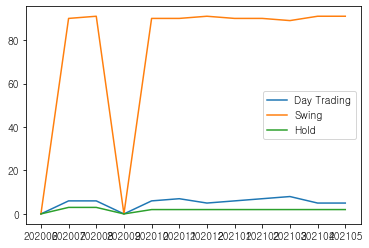

In [ ]:
# n번째 사용자의 day trading/swing/hold 비중 시각화
n = 5

a = day_trading.iloc[n,:]
b = swing.iloc[n,:]
c = hold.iloc[n,:]

a.index = ['202006', '202007', '202008', '202009','202010', '202011', '202012', '202101','202102', '202103', '202104', '202105']
b.index = ['202006', '202007', '202008', '202009','202010', '202011', '202012', '202101','202102', '202103', '202104', '202105']
c.index = ['202006', '202007', '202008', '202009','202010', '202011', '202012', '202101','202102', '202103', '202104', '202105']

plt.plot(a)
plt.plot(b)
plt.plot(c)

plt.legend(['Day Trading', 'Swing', 'Hold'])
plt.show()

### 2.1.2. 주식 거래 패턴

In [ ]:
order_pattern = pd.concat([day_trading, swing, hold], axis=1)

In [ ]:
"""
order_pattern.to_csv('order_pattern.csv', sep=',', encoding='utf-8')
"""

"\norder_pattern.to_csv('order_pattern.csv', sep=',', encoding='utf-8')\n"

## 2.2. 국내/해외 주식자산 비중

### 2.2.1. 국내주식자산, 해외주식자산 데이터 추출

In [ ]:
in_stock_value1 = df[[f'국내주식자산_20200{i}' for i in range(6,10)]]
in_stock_value2 = df[[f'국내주식자산_2020{i}' for i in range(10,13)]]
in_stock_value3 = df[[f'국내주식자산_20210{i}' for i in range(1,6)]]

in_stock_value = pd.concat([in_stock_value1, in_stock_value2, in_stock_value3], axis=1)
for i in in_stock_value:
    in_stock_value.loc[:,i] = pd.to_numeric(in_stock_value.loc[:,i])
    
in_stock_value.head()

,국내주식자산_202006,국내주식자산_202007,국내주식자산_202008,국내주식자산_202009,국내주식자산_202010,국내주식자산_202011,국내주식자산_202012,국내주식자산_202101,국내주식자산_202102,국내주식자산_202103,국내주식자산_202104,국내주식자산_202105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,230000.0,4900000.0,440000.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,1300000.0,0.0,1000000.0,1000000.0,990000.0,0.0,0.0,1400000.0,1400000.0,13000000.0,110000000.0,14000000.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ab_stock_value1 = df[[f'해외주식자산_20200{i}' for i in range(6,10)]]
ab_stock_value2 = df[[f'해외주식자산_2020{i}' for i in range(10,13)]]
ab_stock_value3 = df[[f'해외주식자산_20210{i}' for i in range(1,6)]]

ab_stock_value = pd.concat([ab_stock_value1, ab_stock_value2, ab_stock_value3], axis=1)
for i in ab_stock_value:
    ab_stock_value.loc[:,i] = pd.to_numeric(ab_stock_value.loc[:,i])
    
ab_stock_value.head()

,해외주식자산_202006,해외주식자산_202007,해외주식자산_202008,해외주식자산_202009,해외주식자산_202010,해외주식자산_202011,해외주식자산_202012,해외주식자산_202101,해외주식자산_202102,해외주식자산_202103,해외주식자산_202104,해외주식자산_202105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2.2.2. 국내/해외 주식자산 비중 계산

국내 주식자산 비중 = (국내주식자산/총 주식자산)*100

해외 주식자산 비중 = (해외주식자산/총 주식자산)*100

In [ ]:
date_range = ['006', '007', '008', '009', '010', '011', '012', '101', '102', '103', '104', '105']
in_s_rate = pd.DataFrame()
ab_s_rate = pd.DataFrame()

for i in date_range:
    a = in_stock_value[f'국내주식자산_202{i}']
    b = ab_stock_value[f'해외주식자산_202{i}']
    stock_value = pd.concat([a,b], axis = 1)
    total_stock_value = stock_value.sum(axis = 1)
    stock_value[f'총주식자산_202{i}'] = total_stock_value
    in_rate = (stock_value[f'국내주식자산_202{i}'] / stock_value[f'총주식자산_202{i}']) * 100
    ab_rate = (stock_value[f'해외주식자산_202{i}'] / stock_value[f'총주식자산_202{i}']) * 100
    in_s_rate = pd.concat([in_s_rate, in_rate], axis = 1)
    ab_s_rate = pd.concat([ab_s_rate, ab_rate], axis = 1)
    
in_s_rate.columns = ['in_s_rate_202006', 'in_s_rate_202007', 'in_s_rate_202008', 'in_s_rate_202009','in_s_rate_202010', 'in_s_rate_202011', 'in_s_rate_202012', 'in_s_rate_202101','in_s_rate_202102', 'in_s_rate_202103', 'in_s_rate_202104', 'in_s_rate_202105']
in_s_rate = in_s_rate.fillna(0)
ab_s_rate.columns = ['ab_s_rate_202006', 'ab_s_rate_202007', 'ab_s_rate_202008', 'ab_s_rate_202009','ab_s_rate_202010', 'ab_s_rate_202011', 'ab_s_rate_202012', 'ab_s_rate_202101','ab_s_rate_202102', 'ab_s_rate_202103', 'ab_s_rate_202104', 'ab_s_rate_202105']
ab_s_rate = ab_s_rate.fillna(0)

In [ ]:
in_s_rate.head()

,in_s_rate_202006,in_s_rate_202007,in_s_rate_202008,in_s_rate_202009,in_s_rate_202010,in_s_rate_202011,in_s_rate_202012,in_s_rate_202101,in_s_rate_202102,in_s_rate_202103,in_s_rate_202104,in_s_rate_202105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,100.0,0.0,100.0,100.0,100.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ab_s_rate.head()

,ab_s_rate_202006,ab_s_rate_202007,ab_s_rate_202008,ab_s_rate_202009,ab_s_rate_202010,ab_s_rate_202011,ab_s_rate_202012,ab_s_rate_202101,ab_s_rate_202102,ab_s_rate_202103,ab_s_rate_202104,ab_s_rate_202105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2.2.3. 국내/해외 주식시장 비중

In [ ]:
in_ab_srate = pd.concat([in_s_rate, ab_s_rate], axis=1)

In [ ]:
"""
in_ab_srate.to_csv('in_ab_srate.csv', sep=',', encoding='utf-8')
"""

"\nin_ab_srate.to_csv('in_ab_srate.csv', sep=',', encoding='utf-8')\n"

## 2.3. 국내/해외주식 집중도


### 2.3.1. 국내/해외주식 매수/매도 데이터 추출

In [ ]:
in_stock_buy1 = df[[f'국내주식매수_20200{i}' for i in range(6,10)]]
in_stock_buy2 = df[[f'국내주식매수_2020{i}' for i in range(10,13)]]
in_stock_buy3 = df[[f'국내주식매수_20210{i}' for i in range(1,6)]]

in_stock_buy = pd.concat([in_stock_buy1, in_stock_buy2, in_stock_buy3], axis=1)
for i in in_stock_buy:
    in_stock_buy.loc[:,i] = pd.to_numeric(in_stock_buy.loc[:,i])
    
in_stock_buy.head()

NameError: ignored

In [ ]:
in_stock_sell1 = df[[f'국내주식매도_20200{i}' for i in range(6,10)]]
in_stock_sell2 = df[[f'국내주식매도_2020{i}' for i in range(10,13)]]
in_stock_sell3 = df[[f'국내주식매도_20210{i}' for i in range(1,6)]]

in_stock_sell = pd.concat([in_stock_sell1, in_stock_sell2, in_stock_sell3], axis=1)
for i in in_stock_sell:
    in_stock_sell.loc[:,i] = pd.to_numeric(in_stock_sell.loc[:,i])
    
in_stock_sell.head()

NameError: ignored

In [ ]:
ab_stock_buy1 = df[[f'해외주식매수_20200{i}' for i in range(6,10)]]
ab_stock_buy2 = df[[f'해외주식매수_2020{i}' for i in range(10,13)]]
ab_stock_buy3 = df[[f'해외주식매수_20210{i}' for i in range(1,6)]]

ab_stock_buy = pd.concat([ab_stock_buy1, ab_stock_buy2, ab_stock_buy3], axis=1)
for i in ab_stock_buy:
    ab_stock_buy.loc[:,i] = pd.to_numeric(ab_stock_buy.loc[:,i])
    
ab_stock_buy.head()

In [ ]:
ab_stock_sell1 = df[[f'해외주식매도_20200{i}' for i in range(6,10)]]
ab_stock_sell2 = df[[f'해외주식매도_2020{i}' for i in range(10,13)]]
ab_stock_sell3 = df[[f'해외주식매도_20210{i}' for i in range(1,6)]]

ab_stock_sell = pd.concat([ab_stock_sell1, ab_stock_sell2, ab_stock_sell3], axis=1)
for i in ab_stock_sell:
    ab_stock_sell.loc[:,i] = pd.to_numeric(ab_stock_sell.loc[:,i])
    
ab_stock_sell.head()

### 2.3.2. 국내/해외주식 집중도 계산

국내주식집중도 = (국내주식매수+국내주식매도)/국내주식자산

해외주식집중도 = (해외주식매수+해외주식매도)/해외주식자산

In [ ]:
date_range = ['006', '007', '008', '009', '010', '011', '012', '101', '102', '103', '104', '105']
in_stock_con = pd.DataFrame()

for i in date_range:
    a = in_stock_buy[f'국내주식매수_202{i}']
    b = in_stock_sell[f'국내주식매도_202{i}']
    in_stock_order = pd.concat([a,b], axis = 1)
    in_stock_order_sum = in_stock_order.sum(axis = 1)
    in_stock_order[f'국내주식주문합_202{i}'] = in_stock_order_sum
    in_stock_order_con = in_stock_order_sum / in_stock_value[f'국내주식자산_202{i}']
    in_stock_con = pd.concat([in_stock_con, in_stock_order_con], axis = 1)
    
in_stock_con.columns = ['in_stock_con_202006', 'in_stock_con_202007', 'in_stock_con_202008', 'in_stock_con_202009','in_stock_con_202010', 'in_stock_con_202011', 'in_stock_con_202012', 'in_stock_con_202101','in_stock_con_202102', 'in_stock_con_202103', 'in_stock_con_202104', 'in_stock_con_202105']
in_stock_con = in_stock_con.fillna(0)

in_stock_con.head()

In [ ]:
date_range = ['006', '007', '008', '009', '010', '011', '012', '101', '102', '103', '104', '105']
ab_stock_con = pd.DataFrame()

for i in date_range:
    a = ab_stock_buy[f'해외주식매수_202{i}']
    b = ab_stock_sell[f'해외주식매도_202{i}']
    ab_stock_order = pd.concat([a,b], axis = 1)
    ab_stock_order_sum = ab_stock_order.sum(axis = 1)
    ab_stock_order[f'해외주식주문합_202{i}'] = ab_stock_order_sum
    ab_stock_order_con = ab_stock_order_sum / ab_stock_value[f'해외주식자산_202{i}']
    ab_stock_con = pd.concat([ab_stock_con, ab_stock_order_con], axis = 1)
    
ab_stock_con.columns = ['ab_stock_con_202006', 'ab_stock_con_202007', 'ab_stock_con_202008', 'ab_stock_con_202009','ab_stock_con_202010', 'ab_stock_con_202011', 'ab_stock_con_202012', 'ab_stock_con_202101','ab_stock_con_202102', 'ab_stock_con_202103', 'ab_stock_con_202104', 'ab_stock_con_202105']
ab_stock_con = ab_stock_con.fillna(0)

ab_stock_con.head()

In [ ]:
date_range = ['006', '007', '008', '009', '010', '011', '012', '101', '102', '103', '104', '105']
in_s_con_rate = pd.DataFrame()
ab_s_con_rate = pd.DataFrame()

for i in date_range:
    a = in_stock_con[f'in_stock_con_202{i}']
    b = ab_stock_con[f'ab_stock_con_202{i}']
    stock_con = pd.concat([a,b], axis = 1)
    total_stock_con = stock_con.sum(axis = 1)
    stock_con[f'total_stock_con_202{i}'] = total_stock_con
    in_rate = (in_stock_con[f'in_stock_con_202{i}'] / stock_con[f'total_stock_con_202{i}']) * 100
    ab_rate = (ab_stock_con[f'ab_stock_con_202{i}'] / stock_con[f'total_stock_con_202{i}']) * 100
    in_s_con_rate = pd.concat([in_s_con_rate, in_rate], axis = 1)
    ab_s_con_rate = pd.concat([ab_s_con_rate, ab_rate], axis = 1)
    
column_name = 'in_s_con_rate'

in_s_con_rate.columns = [f'{column_name}_202006', f'{column_name}_202007', f'{column_name}_202008', f'{column_name}_202009',f'{column_name}_202010', f'{column_name}_202011', f'{column_name}_202012', f'{column_name}_202101', f'{column_name}_202102', f'{column_name}_202103', f'{column_name}_202104', f'{column_name}_202105']
in_s_con_rate = in_s_con_rate.fillna(0)

column_name = 'ab_s_con_rate'

ab_s_con_rate.columns = [f'{column_name}_202006', f'{column_name}_202007', f'{column_name}_202008', f'{column_name}_202009',f'{column_name}_202010', f'{column_name}_202011', f'{column_name}_202012', f'{column_name}_202101', f'{column_name}_202102', f'{column_name}_202103', f'{column_name}_202104', f'{column_name}_202105']
ab_s_con_rate = ab_s_con_rate.fillna(0)

In [ ]:
in_s_con_rate.head()

In [ ]:
ab_s_con_rate.head()

### 2.3.3. 국내/해외주식 집중도

In [ ]:
in_ab_conrate = pd.concat([in_s_con_rate, ab_s_con_rate], axis=1)

In [ ]:
"""
in_ab_conrate.to_csv('in_ab_conrate.csv', sep=',', encoding='utf-8')
"""

## 2.4. 주식 거래 활발도
: 거래종목수

### 2.4.1. 거래종목수 데이터 추출

In [ ]:
stock_order_n1 = df[[f'거래종목수_20200{i}' for i in range(6,10)]]
stock_order_n2 = df[[f'거래종목수_2020{i}' for i in range(10,13)]]
stock_order_n3 = df[[f'거래종목수_20210{i}' for i in range(1,6)]]

stock_order_n = pd.concat([stock_order_n1, stock_order_n2, stock_order_n3], axis=1)
for i in stock_order_n:
    stock_order_n.loc[:,i] = pd.to_numeric(stock_order_n.loc[:,i])
    
stock_order_n.head()

,거래종목수_202006,거래종목수_202007,거래종목수_202008,거래종목수_202009,거래종목수_202010,거래종목수_202011,거래종목수_202012,거래종목수_202101,거래종목수_202102,거래종목수_202103,거래종목수_202104,거래종목수_202105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,8.0,3.0,11.0,4.0,0.0,0.0,0.0,3.0,5.0,4.0,13.0,7.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2.4.2. 주식 거래 활발도

In [ ]:
activity = stock_order_n.copy()

date_range = ['006', '007', '008', '009', '010', '011', '012', '101', '102', '103', '104', '105']
activity.columns = [f'활발도_202{i}' for i in date_range]

In [ ]:
"""
activity.to_csv('activity.csv', sep=',', encoding='utf-8')
"""

"\nactivity.to_csv('activity.csv', sep=',', encoding='utf-8')\n"

## 2.5. 포트폴리오 다양성
: 거래종목수 + 보유종목수

### 2.5.1. 거래종목수, 보유종목수 데이터 추출

In [ ]:
stock_order_n.shape

(300000, 12)

In [ ]:
stock_order_n.head()

,거래종목수_202006,거래종목수_202007,거래종목수_202008,거래종목수_202009,거래종목수_202010,거래종목수_202011,거래종목수_202012,거래종목수_202101,거래종목수_202102,거래종목수_202103,거래종목수_202104,거래종목수_202105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,8.0,3.0,11.0,4.0,0.0,0.0,0.0,3.0,5.0,4.0,13.0,7.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
column_name = '보유종목수'

stock_hold_n1 = df[[f'{column_name}_20200{i}' for i in range(6,10)]]
stock_hold_n2 = df[[f'{column_name}_2020{i}' for i in range(10,13)]]
stock_hold_n3 = df[[f'{column_name}_20210{i}' for i in range(1,6)]]

stock_hold_n = pd.concat([stock_hold_n1, stock_hold_n2, stock_hold_n3], axis=1)
for i in stock_hold_n:
    stock_hold_n.loc[:,i] = pd.to_numeric(stock_hold_n.loc[:,i])
    
stock_hold_n.head()

,보유종목수_202006,보유종목수_202007,보유종목수_202008,보유종목수_202009,보유종목수_202010,보유종목수_202011,보유종목수_202012,보유종목수_202101,보유종목수_202102,보유종목수_202103,보유종목수_202104,보유종목수_202105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,3.0,6.0,6.0,4.0,4.0,3.0,3.0,3.0,5.0,5.0,6.0,9.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2.5.2. 포트폴리오 다양성

In [ ]:
date_range = ['006', '007', '008', '009', '010', '011', '012', '101', '102', '103', '104', '105']
stock_n = pd.DataFrame()

for i in date_range:
    a = stock_order_n[f'거래종목수_202{i}']
    b = stock_hold_n[f'보유종목수_202{i}']
    stock_total_n = pd.concat([a,b], axis = 1)
    stock_n_sum = stock_total_n.sum(axis = 1)
    stock_total_n[f'총종목수_202{i}'] = stock_n_sum
    stock_n = pd.concat([stock_n, stock_total_n[f'총종목수_202{i}']], axis = 1)
    
stock_n.head()

,총종목수_202006,총종목수_202007,총종목수_202008,총종목수_202009,총종목수_202010,총종목수_202011,총종목수_202012,총종목수_202101,총종목수_202102,총종목수_202103,총종목수_202104,총종목수_202105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,11.0,9.0,17.0,8.0,4.0,3.0,3.0,6.0,10.0,9.0,19.0,16.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
"""
stock_n.to_csv('stock_n.csv', sep=',', encoding='utf-8')
"""

"\nstock_n.to_csv('stock_n.csv', sep=',', encoding='utf-8')\n"

## 2.6. 매체 이용 성향
: m.Gobal 대비 m.Stock 접속 비중

### 2.6.1. m.stock/m.global 접속일수 데이터 추출

In [ ]:
stock1 = df[[f'm.Stock_접속일수_20200{i}' for i in range(6,10)]]
stock2 = df[[f'm.Stock_접속일수_2020{i}' for i in range(10,13)]]
stock3 = df[[f'm.Stock_접속일수_20210{i}' for i in range(1,6)]]

mstock = pd.concat([stock1, stock2, stock3], axis=1)
for i in mstock:
    mstock.loc[:,i] = pd.to_numeric(mstock.loc[:,i])
    
mstock.head()

,m.Stock_접속일수_202006,m.Stock_접속일수_202007,m.Stock_접속일수_202008,m.Stock_접속일수_202009,m.Stock_접속일수_202010,m.Stock_접속일수_202011,m.Stock_접속일수_202012,m.Stock_접속일수_202101,m.Stock_접속일수_202102,m.Stock_접속일수_202103,m.Stock_접속일수_202104,m.Stock_접속일수_202105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
250034,23.0,16.0,23.0,19.0,14.0,17.0,24.0,18.0,17.0,20.0,23.0,21.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
64750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,27.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [ ]:
global1 = df[[f'm.Global_접속일수_20200{i}' for i in range(6,10)]]
global2 = df[[f'm.Global_접속일수_2020{i}' for i in range(10,13)]]
global3 = df[[f'm.Global_접속일수_20210{i}' for i in range(1,6)]]

mglobal = pd.concat([global1, global2, global3], axis=1)

for i in mglobal:
    mglobal.loc[:,i] = pd.to_numeric(mglobal.loc[:,i])
    
mglobal.head()

,m.Global_접속일수_202006,m.Global_접속일수_202007,m.Global_접속일수_202008,m.Global_접속일수_202009,m.Global_접속일수_202010,m.Global_접속일수_202011,m.Global_접속일수_202012,m.Global_접속일수_202101,m.Global_접속일수_202102,m.Global_접속일수_202103,m.Global_접속일수_202104,m.Global_접속일수_202105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,17.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2.6.2. m.stock/m.global 접속 비중 계산

In [ ]:
stock_global = pd.DataFrame(index = range(0, len(df)), columns = [])
for i in range(0,12):
    stock_global[i] = mstock.iloc[:, i]/(mstock.iloc[:, i] + mglobal.iloc[:, i])

stock_global.fillna(0, inplace=True)

stock_global.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.00000,1.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.857143,0.74359,0.763158
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000
5,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.00000,1.000000
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000
8,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.00000,1.000000
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.000000,1.00000,1.000000


### 2.6.3. m.stock/m.global 접속정도

In [ ]:
colname = 'm.Stock접속비중'
stock_global.columns = [f'{colname}_202006', f'{colname}_202007', f'{colname}_202008', f'{colname}_202009',
                       f'{colname}_202010', f'{colname}_202011', f'{colname}_202012', f'{colname}_202101',
                       f'{colname}_202102', f'{colname}_202103', f'{colname}_202104', f'{colname}_202105']

In [ ]:
"""
stock_global.to_csv('stock_global_rate.csv', sep=',', encoding='utf-8')
"""

"\nstock_global.to_csv('stock_global_rate.csv', sep=',', encoding='utf-8')\n"

## 2.7. 선호시장

### 2.7.1. 선호시장 데이터 추출

In [ ]:
prefer1 = df[[f'선호시장_20200{i}' for i in range(6,10)]]
prefer2 = df[[f'선호시장_2020{i}' for i in range(10,13)]]
prefer3 = df[[f'선호시장_20210{i}' for i in range(1,6)]]

prefer = pd.concat([prefer1, prefer2, prefer3], axis=1)

prefer.head()

,선호시장_202006,선호시장_202007,선호시장_202008,선호시장_202009,선호시장_202010,선호시장_202011,선호시장_202012,선호시장_202101,선호시장_202102,선호시장_202103,선호시장_202104,선호시장_202105
1390825,0,0,0,0,0,0,0,0,0,0,0,0
250034,0,코스피,코스피,코스피,코스피,코스피,코스피,코스피,코스피,코스피,코스피,코스피
695531,0,0,0,0,0,0,0,0,0,0,0,0
64750,0,0,0,0,0,0,0,0,0,0,코스피,코스피
1288685,0,0,0,0,0,0,0,0,0,0,0,0


### 2.7.2. 선호시장 인코딩
0 : 누락 및 미기입 / 1 : 코스피 / 2 : 코스닥 / 3 : 시장전체

In [ ]:
prefer_changedict = {'코스피':1, '코스닥':2, '시장전체':3}
prefer = prefer.replace(prefer_changedict)

for i in prefer:
    prefer.loc[:,i] = pd.to_numeric(prefer.loc[:,i])
    
prefer.head()

,선호시장_202006,선호시장_202007,선호시장_202008,선호시장_202009,선호시장_202010,선호시장_202011,선호시장_202012,선호시장_202101,선호시장_202102,선호시장_202103,선호시장_202104,선호시장_202105
1390825,0,0,0,0,0,0,0,0,0,0,0,0
250034,0,1,1,1,1,1,1,1,1,1,1,1
695531,0,0,0,0,0,0,0,0,0,0,0,0
64750,0,0,0,0,0,0,0,0,0,0,1,1
1288685,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
"""
prefer.to_csv('prefer.csv', sep=',', encoding='utf-8')
"""

"\nprefer.to_csv('prefer.csv', sep=',', encoding='utf-8')\n"

In [ ]:
# prefer_rowcount = prefer.apply(lambda s: s.value_counts(), axis=1).fillna(0)

In [ ]:
# prefer_rowcount

## 2.8. 이익실현, 손절 비중

### 2.8.1. 이익실현횟수, 손절횟수 데이터 추출

In [ ]:
profit1 = df[[f'이익실현횟수_20200{i}' for i in range(6,10)]]
profit2 = df[[f'이익실현횟수_2020{i}' for i in range(10,13)]]
profit3 = df[[f'이익실현횟수_20210{i}' for i in range(1,6)]]

profit = pd.concat([profit1, profit2, profit3], axis=1)
for i in profit:
    profit.loc[:,i] = pd.to_numeric(profit.loc[:,i])

profit.head()

,이익실현횟수_202006,이익실현횟수_202007,이익실현횟수_202008,이익실현횟수_202009,이익실현횟수_202010,이익실현횟수_202011,이익실현횟수_202012,이익실현횟수_202101,이익실현횟수_202102,이익실현횟수_202103,이익실현횟수_202104,이익실현횟수_202105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,0.0,6.0,7.0,13.0,16.0,16.0,15.0,10.0,11.0,10.0,19.0,31.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
loss1 = df[[f'손절횟수_20200{i}' for i in range(6,10)]]
loss2 = df[[f'손절횟수_2020{i}' for i in range(10,13)]]
loss3 = df[[f'손절횟수_20210{i}' for i in range(1,6)]]

loss = pd.concat([loss1, loss2, loss3], axis=1)
for i in loss:
    loss.loc[:,i] = pd.to_numeric(loss.loc[:,i])
    
loss.head()

,손절횟수_202006,손절횟수_202007,손절횟수_202008,손절횟수_202009,손절횟수_202010,손절횟수_202011,손절횟수_202012,손절횟수_202101,손절횟수_202102,손절횟수_202103,손절횟수_202104,손절횟수_202105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,0.0,1.0,1.0,4.0,5.0,5.0,4.0,4.0,4.0,2.0,1.0,6.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2.8.2. 이익실현 비중 계산
(이익실현횟수) / (이익실현횟수 + 손절횟수)

In [ ]:
profit_loss = pd.DataFrame(index = range(0, len(df)), columns = [])
for i in range(0,12):
    profit_loss[i] = profit.iloc[:, i]/(profit.iloc[:, i] + loss.iloc[:, i])

profit_loss.fillna(0, inplace=True)

profit_loss.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.500000,0.777778,0.696970,0.590909
4,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.0,0.666667,0.652174,0.0,0.644628,0.631148,0.636364,0.576271,0.590164,0.580357,0.617647,0.640449
6,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.0,0.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.923077,0.909091,0.916667,0.916667
9,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.697674,0.805556,0.818182,0.841667,0.837838


### 2.8.3. 이익실현 비중

In [ ]:
colname = '이익실현비중'
profit_loss.columns = [f'{colname}_202006', f'{colname}_202007', f'{colname}_202008', f'{colname}_202009',
                       f'{colname}_202010', f'{colname}_202011', f'{colname}_202012', f'{colname}_202101',
                       f'{colname}_202102', f'{colname}_202103', f'{colname}_202104', f'{colname}_202105']

In [ ]:
"""
profit_loss.to_csv('profit_loss.csv', sep=',', encoding='utf-8')
"""

"\nprofit_loss.to_csv('profit_loss.csv', sep=',', encoding='utf-8')\n"

## 2.9. 신용/대출 성향
: 신용거래 금액

In [ ]:
credit1 = df[[f'신용_20200{i}' for i in range(6,10)]]
credit2 = df[[f'신용_2020{i}' for i in range(10,13)]]
credit3 = df[[f'신용_20210{i}' for i in range(1,6)]]

credit = pd.concat([credit1, credit2, credit3], axis=1)
for i in credit:
    credit.loc[:,i] = pd.to_numeric(credit.loc[:,i])

credit.head()

,신용_202006,신용_202007,신용_202008,신용_202009,신용_202010,신용_202011,신용_202012,신용_202101,신용_202102,신용_202103,신용_202104,신용_202105
1390825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
695531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1288685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
"""
credit.to_csv('credit.csv', sep=',', encoding='utf-8')
"""

"\ncredit.to_csv('credit.csv', sep=',', encoding='utf-8')\n"

# 3. 사용자별 관심종목 분석

## 3.1. 주식 '보유/매수/매도'별 '1위~3위' 데이터 추출

In [ ]:
f_hold_name1 = df[[f'주식보유1위종목_20200{i}' for i in range(6,10)]]
f_hold_name2 = df[[f'주식보유1위종목_2020{i}' for i in range(10,13)]]
f_hold_name3 = df[[f'주식보유1위종목_20210{i}' for i in range(1,6)]]
f_hold_name = pd.concat([f_hold_name1, f_hold_name2, f_hold_name3], axis=1)

s_hold_name1 = df[[f'주식보유2위종목_20200{i}' for i in range(6,10)]]
s_hold_name2 = df[[f'주식보유2위종목_2020{i}' for i in range(10,13)]]
s_hold_name3 = df[[f'주식보유2위종목_20210{i}' for i in range(1,6)]]
s_hold_name = pd.concat([s_hold_name1, s_hold_name2, s_hold_name3], axis=1)

t_hold_name1 = df[[f'주식보유3위종목_20200{i}' for i in range(6,10)]]
t_hold_name2 = df[[f'주식보유3위종목_2020{i}' for i in range(10,13)]]
t_hold_name3 = df[[f'주식보유3위종목_20210{i}' for i in range(1,6)]]
t_hold_name = pd.concat([t_hold_name1, t_hold_name2, t_hold_name3], axis=1)
print(f_hold_name.shape, s_hold_name.shape, t_hold_name.shape)

(300000, 12) (300000, 12) (300000, 12)


In [ ]:
f_buy_name1 = df[[f'주식매수1위종목_20200{i}' for i in range(6,10)]]
f_buy_name2 = df[[f'주식매수1위종목_2020{i}' for i in range(10,13)]]
f_buy_name3 = df[[f'주식매수1위종목_20210{i}' for i in range(1,6)]]
f_buy_name = pd.concat([f_buy_name1, f_buy_name2, f_buy_name3], axis=1)

s_buy_name1 = df[[f'주식매수2위종목_20200{i}' for i in range(6,10)]]
s_buy_name2 = df[[f'주식매수2위종목_2020{i}' for i in range(10,13)]]
s_buy_name3 = df[[f'주식매수2위종목_20210{i}' for i in range(1,6)]]
s_buy_name = pd.concat([s_buy_name1, s_buy_name2, s_buy_name3], axis=1)

t_buy_name1 = df[[f'주식매수3위종목_20200{i}' for i in range(6,10)]]
t_buy_name2 = df[[f'주식매수3위종목_2020{i}' for i in range(10,13)]]
t_buy_name3 = df[[f'주식매수3위종목_20210{i}' for i in range(1,6)]]
t_buy_name = pd.concat([t_buy_name1, t_buy_name2, t_buy_name3], axis=1)
print(t_buy_name.shape, t_buy_name.shape, t_buy_name.shape)

(300000, 12) (300000, 12) (300000, 12)


In [ ]:
f_sell_name1 = df[[f'주식매도1위종목_20200{i}' for i in range(6,10)]]
f_sell_name2 = df[[f'주식매도1위종목_2020{i}' for i in range(10,13)]]
f_sell_name3 = df[[f'주식매도1위종목_20210{i}' for i in range(1,6)]]
f_sell_name = pd.concat([f_sell_name1, f_sell_name2, f_sell_name3], axis=1)

s_sell_name1 = df[[f'주식매도2위종목_20200{i}' for i in range(6,10)]]
s_sell_name2 = df[[f'주식매도2위종목_2020{i}' for i in range(10,13)]]
s_sell_name3 = df[[f'주식매도2위종목_20210{i}' for i in range(1,6)]]
s_sell_name = pd.concat([s_sell_name1, s_sell_name2, s_sell_name3], axis=1)

t_sell_name1 = df[[f'주식매도3위종목_20200{i}' for i in range(6,10)]]
t_sell_name2 = df[[f'주식매도3위종목_2020{i}' for i in range(10,13)]]
t_sell_name3 = df[[f'주식매도3위종목_20210{i}' for i in range(1,6)]]
t_sell_name = pd.concat([t_sell_name1, t_sell_name2, t_sell_name3], axis=1)
print(t_sell_name.shape, t_sell_name.shape, t_sell_name.shape)

(300000, 12) (300000, 12) (300000, 12)


## 3.2. 관심종목 정보

### 3.2.1. 외부데이터 불러오기

In [ ]:
KOSPI = pd.read_csv('KOSPI.csv', engine='python', encoding = 'CP949')
KOSDAQ = pd.read_csv('KOSDAQ.csv', engine='python', encoding = 'CP949')
elw = pd.read_csv('elw.csv', engine='python', encoding = 'CP949')
etf = pd.read_csv('etf.csv', engine='python', encoding = 'CP949')
etn = pd.read_csv('etn.csv', engine='python', encoding = 'CP949')
USA = pd.read_csv('USA.csv')
add = pd.read_csv('업종추가_최종.csv', engine='python', encoding = 'CP949')

### 3.2.2. 시장+주식종류+소속부 사전

In [ ]:
dic_KOSPI1 = KOSPI[['단축코드']]
dic_KOSDAQ1 = KOSDAQ[['단축코드']]
dic_elw1 = elw[['단축코드']]
dic_etf1 = etf[['단축코드']]
dic_etn1 = etn[['단축코드']]
dic_USA1 = USA[['기호']]

In [ ]:
#코스피
dic_KOSPI1['주식종류'] = KOSPI[['시장구분','주식종류']].apply(lambda x: '_'.join(x), axis=1)

for i in range(len(dic_KOSPI1)) :
    dic_KOSPI1['단축코드'][i] = 'A'+str(dic_KOSPI1['단축코드'][i])

dic_KOSPI1 = dic_KOSPI1.set_index('단축코드').T.to_dict('list')

<ipython-input-67-8f99365ec680>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dic_KOSPI1['주식종류'] = KOSPI[['시장구분','주식종류']].apply(lambda x: '_'.join(x), axis=1)
C:\Users\choij\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#코스닥
dic_KOSDAQ1['주식종류'] = KOSDAQ[['시장구분','주식종류','소속부']].apply(lambda x: '_'.join(x), axis=1)

for i in range(len(dic_KOSDAQ1)) :
    dic_KOSDAQ1['단축코드'][i] = 'A'+str(dic_KOSDAQ1['단축코드'][i])

dic_KOSDAQ1 = dic_KOSDAQ1.set_index('단축코드').T.to_dict('list')

<ipython-input-68-24acd2a2b36d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dic_KOSDAQ1['주식종류'] = KOSDAQ[['시장구분','주식종류','소속부']].apply(lambda x: '_'.join(x), axis=1)


In [ ]:
#ELW
for i in range(len(dic_elw1)) :
    dic_elw1['단축코드'][i] = 'A'+str(dic_elw1['단축코드'][i])

dic_elw1['시장구분'] = 'ELW'
dic_elw1 = dic_elw1.set_index('단축코드').T.to_dict('list')

<ipython-input-69-a8113f47b1ed>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dic_elw1['시장구분'] = 'ELW'


In [ ]:
#ETF
for i in range(len(dic_etf1)) :
    dic_etf1['단축코드'][i] = 'A'+str(dic_etf1['단축코드'][i])

dic_etf1['시장구분'] = 'ETF'
dic_etf1 = dic_etf1.set_index('단축코드').T.to_dict('list')

C:\Users\choij\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
<ipython-input-70-fd5339e37265>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dic_etf1['시장구분'] = 'ETF'


In [ ]:
#ETN
for i in range(len(dic_etn1)) :
    dic_etn1['단축코드'][i] = 'A'+str(dic_etn1['단축코드'][i])
    
dic_etn1['시장구분'] = 'ETN'
dic_etn1 = dic_etn1.set_index('단축코드').T.to_dict('list')

<ipython-input-71-99cafaa964c9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dic_etn1['시장구분'] = 'ETN'


In [ ]:
#USA
dic_USA1['시장구분'] = 'USA'
dic_USA1 = dic_USA1.set_index('기호').T.to_dict('list')

<ipython-input-72-ffdccebe8899>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dic_USA1['시장구분'] = 'USA'


In [ ]:
#추가 코스피
add_kospi = add['시장구분'] == 'KOSPI'
add_kospi = add[add_kospi]

dic_add_kospi = add_kospi[['종목코드']]
dic_add_kospi['주식종류'] = add_kospi[['시장구분','주식종류']].apply(lambda x: '_'.join(x), axis=1)
dic_add_kospi = dic_add_kospi.set_index('종목코드').T.to_dict('list')
dic_add_kospi

<ipython-input-73-b3408685da3c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dic_add_kospi['주식종류'] = add_kospi[['시장구분','주식종류']].apply(lambda x: '_'.join(x), axis=1)


{'A003415': ['KOSPI_우선주'],
 'A152330': ['KOSPI_보통주'],
 'A004200': ['KOSPI_보통주'],
 'A033660': ['KOSPI_보통주'],
 'A002300': ['KOSPI_보통주'],
 'A005190': ['KOSPI_보통주']}

In [ ]:
#추가 코스닥
add_kosdaq = add['시장구분'] == 'KOSDAQ'
add_kosdaq = add[add_kosdaq]

dic_add_kosdaq = add_kosdaq[['종목코드']]
dic_add_kosdaq['주식종류'] = add_kosdaq[['시장구분','주식종류','소속부']].apply(lambda x: '_'.join(x), axis=1)
dic_add_kosdaq = dic_add_kosdaq.set_index('종목코드').T.to_dict('list')
dic_add_kosdaq

<ipython-input-74-ff3811b1b994>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dic_add_kosdaq['주식종류'] = add_kosdaq[['시장구분','주식종류','소속부']].apply(lambda x: '_'.join(x), axis=1)
<ipython-input-74-ff3811b1b994>:7: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  dic_add_kosdaq = dic_add_kosdaq.set_index('종목코드').T.to_dict('list')


{'A065940': ['KOSDAQ_보통주_관리 및 투자주의환기종목'],
 'A204990': ['KOSDAQ_보통주_관리 및 투자주의환기종목'],
 'A141070': ['KOSDAQ_보통주_벤처기업부'],
 'A073070': ['KOSDAQ_보통주_투자주의환기종목'],
 'A057500': ['KOSDAQ_보통주_우량기업부'],
 'A102210': ['KOSDAQ_보통주_관리종목'],
 'A036260': ['KOSDAQ_보통주_관리 및 투자주의환기종목'],
 'A108790': ['KOSDAQ_보통주_중견기업부'],
 'A028150': ['KOSDAQ_보통주_우량기업부'],
 'A033430': ['KOSDAQ_보통주_관리 및 투자주의환기종목'],
 'A134780': ['KOSDAQ_보통주_관리 및 투자주의환기종목'],
 'A038160': ['KOSDAQ_보통주_관리 및 투자주의환기종목'],
 'A226350': ['KOSDAQ_보통주_관리 및 투자주의환기종목'],
 'A900080': ['KOSDAQ_보통주_외국기업'],
 'A086250': ['KOSDAQ_보통주_관리종목'],
 'A194510': ['KOSDAQ_보통주_관리 및 투자주의환기종목'],
 'A065620': ['KOSDAQ_보통주_관리 및 투자주의환기종목'],
 'A023890': ['KOSDAQ_보통주_우량기업부'],
 'A080440': ['KOSDAQ_보통주_관리 및 투자주의환기종목'],
 'A195440': ['KOSDAQ_보통주_관리 및 투자주의환기종목'],
 'A033600': ['KOSDAQ_보통주_관리 및 투자주의환기종목'],
 'A008800': ['KOSDAQ_보통주_관리 및 투자주의환기종목'],
 'A028040': ['KOSDAQ_보통주_관리 및 투자주의환기종목'],
 'A149940': ['KOSDAQ_보통주_관리 및 투자주의환기종목'],
 'A043290': ['KOSDAQ_보통주_벤처기업부'],
 'A307070': ['KOSDAQ_보통주_SPAC'

In [ ]:
print(len(dic_KOSPI1)+ len(dic_KOSDAQ1)+ len(dic_elw1)+ len(dic_etf1)+len(dic_etn1)+len(dic_USA1)+len(dic_add_kospi)+len(dic_add_kosdaq))

6929


In [ ]:
len({**dic_KOSPI1, **dic_KOSDAQ1, **dic_elw1, **dic_etf1, **dic_etn1, **dic_USA1, **dic_add_kospi, **dic_add_kosdaq})

6929

In [ ]:
type_dic = {**dic_KOSPI1, **dic_KOSDAQ1, **dic_elw1, **dic_etf1, **dic_etn1, **dic_USA1, **dic_add_kospi, **dic_add_kosdaq}
type_dic

{'A095570': ['KOSPI_보통주'],
 'A006840': ['KOSPI_보통주'],
 'A282330': ['KOSPI_보통주'],
 'A027410': ['KOSPI_보통주'],
 'A138930': ['KOSPI_보통주'],
 'A001465': ['KOSPI_구형우선주'],
 'A001460': ['KOSPI_보통주'],
 'A001045': ['KOSPI_구형우선주'],
 'A00104K': ['KOSPI_신형우선주'],
 'A001040': ['KOSPI_보통주'],
 'A011155': ['KOSPI_구형우선주'],
 'A011150': ['KOSPI_보통주'],
 'A000590': ['KOSPI_보통주'],
 'A012030': ['KOSPI_보통주'],
 'A016610': ['KOSPI_보통주'],
 'A005830': ['KOSPI_보통주'],
 'A000995': ['KOSPI_구형우선주'],
 'A000990': ['KOSPI_보통주'],
 'A139130': ['KOSPI_보통주'],
 'A001530': ['KOSPI_보통주'],
 'A000215': ['KOSPI_구형우선주'],
 'A001880': ['KOSPI_보통주'],
 'A000210': ['KOSPI_보통주'],
 'A37550K': ['KOSPI_종류주권'],
 'A375500': ['KOSPI_보통주'],
 'A155660': ['KOSPI_보통주'],
 'A069730': ['KOSPI_보통주'],
 'A017940': ['KOSPI_보통주'],
 'A365550': ['KOSPI_보통주'],
 'A383220': ['KOSPI_보통주'],
 'A007700': ['KOSPI_보통주'],
 'A078935': ['KOSPI_구형우선주'],
 'A006360': ['KOSPI_보통주'],
 'A078930': ['KOSPI_보통주'],
 'A012630': ['KOSPI_보통주'],
 'A294870': ['KOSPI_보통주'],
 'A003560': [

### 3.2.3. 사전 값으로 대체

In [ ]:
for i in tqdm(f_hold_name.columns) :
    f_hold_name[i] = f_hold_name[i].replace(type_dic)
    
# 용어 통일
uni_dic = {'KOSPI_구형우선주':'KOSPI_우선주', 
       'KOSPI_신형우선주':'KOSPI_우선주',
      'KOSDAQ_보통주_투자주의환기종목(소속부없음)':'KOSDAQ_보통주_관리 및 투자주의환기종목', 
       'KOSDAQ_보통주_관리종목(소속부없음)':'KOSDAQ_보통주_관리 및 투자주의환기종목', 
       'KOSDAQ_보통주_외국기업(소속부없음)':'KOSDAQ_보통주_외국기업', 
       'KOSDAQ_보통주_SPAC(소속부없음)':'KOSDAQ_보통주_SPAC',
      'KOSDAQ_신형우선주_중견기업부' : 'KOSDAQ_우선주_중견기업부',
      'KOSDAQ_종류주권_투자주의환기종목(소속부없음)' : 'KOSDAQ_종류주권_관리 및 투자주의환기종목',
      'KOSDAQ_보통주_관리종목' :  'KOSDAQ_보통주_관리 및 투자주의환기종목',
      'KOSDAQ_보통주_투자주의환기종목' : 'KOSDAQ_보통주_관리 및 투자주의환기종목',
      'USA' : '해외'}

for i in tqdm(f_hold_name.columns) :
    f_hold_name[i] = f_hold_name[i].replace(uni_dic)
    
type = ['ETF', 'ELW', 'ETN', 
        'KOSDAQ_보통주_SPAC','KOSDAQ_보통주_관리 및 투자주의환기종목', 
        'KOSDAQ_보통주_기술성장기업부','KOSDAQ_보통주_벤처기업부',
        'KOSDAQ_보통주_외국기업','KOSDAQ_보통주_우량기업부',
        'KOSDAQ_보통주_중견기업부',
        'KOSDAQ_우선주_SPAC','KOSDAQ_우선주_관리 및 투자주의환기종목', 
        'KOSDAQ_우선주_기술성장기업부','KOSDAQ_우선주_벤처기업부',
        'KOSDAQ_우선주_외국기업','KOSDAQ_우선주_우량기업부',
        'KOSDAQ_우선주_중견기업부',
        'KOSDAQ_종류주권_SPAC','KOSDAQ_종류주권_관리 및 투자주의환기종목', 
        'KOSDAQ_종류주권_기술성장기업부','KOSDAQ_종류주권_벤처기업부',
        'KOSDAQ_종류주권_외국기업','KOSDAQ_종류주권_우량기업부',
        'KOSDAQ_종류주권_중견기업부', 'KOSPI_보통주', 'KOSPI_우선주',
        'KOSPI_종류주권','기타', '해외', '0']

for i in tqdm(f_hold_name.columns):
    f_hold_name[i] = f_hold_name[i].apply(lambda x: '기타' if x not in type else x)
    
blink = np.empty(shape=1)

for i in tqdm(f_hold_name.nunique().index):
    unique = f_hold_name[i].unique()
    blink = np.hstack((blink,unique))
    
blink = blink.tolist()
set(blink)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 65.70it/s]


{'0',
 2e-323,
 'KOSDAQ_보통주_SPAC',
 'KOSDAQ_보통주_관리 및 투자주의환기종목',
 'KOSDAQ_보통주_기술성장기업부',
 'KOSDAQ_보통주_벤처기업부',
 'KOSDAQ_보통주_외국기업',
 'KOSDAQ_보통주_우량기업부',
 'KOSDAQ_보통주_중견기업부',
 'KOSDAQ_우선주_중견기업부',
 'KOSPI_보통주',
 'KOSPI_우선주',
 'KOSPI_종류주권',
 '기타'}

In [ ]:
f_hold_name.isnull().sum()

주식보유1위종목_202006    0
주식보유1위종목_202007    0
주식보유1위종목_202008    0
주식보유1위종목_202009    0
주식보유1위종목_202010    0
주식보유1위종목_202011    0
주식보유1위종목_202012    0
주식보유1위종목_202101    0
주식보유1위종목_202102    0
주식보유1위종목_202103    0
주식보유1위종목_202104    0
주식보유1위종목_202105    0
dtype: int64

In [ ]:
for i in tqdm(s_hold_name.columns) :
    s_hold_name[i] = s_hold_name[i].replace(type_dic)
    
# 용어 통일
uni_dic = {'KOSPI_구형우선주':'KOSPI_우선주', 
       'KOSPI_신형우선주':'KOSPI_우선주',
      'KOSDAQ_보통주_투자주의환기종목(소속부없음)':'KOSDAQ_보통주_관리 및 투자주의환기종목', 
       'KOSDAQ_보통주_관리종목(소속부없음)':'KOSDAQ_보통주_관리 및 투자주의환기종목', 
       'KOSDAQ_보통주_외국기업(소속부없음)':'KOSDAQ_보통주_외국기업', 
       'KOSDAQ_보통주_SPAC(소속부없음)':'KOSDAQ_보통주_SPAC',
      'KOSDAQ_신형우선주_중견기업부' : 'KOSDAQ_우선주_중견기업부',
      'KOSDAQ_종류주권_투자주의환기종목(소속부없음)' : 'KOSDAQ_종류주권_관리 및 투자주의환기종목',
      'KOSDAQ_보통주_관리종목' :  'KOSDAQ_보통주_관리 및 투자주의환기종목',
      'KOSDAQ_보통주_투자주의환기종목' : 'KOSDAQ_보통주_관리 및 투자주의환기종목',
      'USA' : '해외'}

for i in tqdm(s_hold_name.columns) :
    s_hold_name[i] = s_hold_name[i].replace(uni_dic)
    
type = ['ETF', 'ELW', 'ETN', 
        'KOSDAQ_보통주_SPAC','KOSDAQ_보통주_관리 및 투자주의환기종목', 
        'KOSDAQ_보통주_기술성장기업부','KOSDAQ_보통주_벤처기업부',
        'KOSDAQ_보통주_외국기업','KOSDAQ_보통주_우량기업부',
        'KOSDAQ_보통주_중견기업부',
        'KOSDAQ_우선주_SPAC','KOSDAQ_우선주_관리 및 투자주의환기종목', 
        'KOSDAQ_우선주_기술성장기업부','KOSDAQ_우선주_벤처기업부',
        'KOSDAQ_우선주_외국기업','KOSDAQ_우선주_우량기업부',
        'KOSDAQ_우선주_중견기업부',
        'KOSDAQ_종류주권_SPAC','KOSDAQ_종류주권_관리 및 투자주의환기종목', 
        'KOSDAQ_종류주권_기술성장기업부','KOSDAQ_종류주권_벤처기업부',
        'KOSDAQ_종류주권_외국기업','KOSDAQ_종류주권_우량기업부',
        'KOSDAQ_종류주권_중견기업부', 'KOSPI_보통주', 'KOSPI_우선주',
        'KOSPI_종류주권','기타', '해외', '0']

for i in tqdm(s_hold_name.columns):
    s_hold_name[i] = s_hold_name[i].apply(lambda x: '기타' if x not in type else x)
    
blink = np.empty(shape=1)

for i in tqdm(s_hold_name.nunique().index):
    unique = s_hold_name[i].unique()
    blink = np.hstack((blink,unique))
    
blink = blink.tolist()
set(blink)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 68.36it/s]


{'0',
 2e-323,
 'KOSDAQ_보통주_SPAC',
 'KOSDAQ_보통주_관리 및 투자주의환기종목',
 'KOSDAQ_보통주_기술성장기업부',
 'KOSDAQ_보통주_벤처기업부',
 'KOSDAQ_보통주_외국기업',
 'KOSDAQ_보통주_우량기업부',
 'KOSDAQ_보통주_중견기업부',
 'KOSDAQ_우선주_중견기업부',
 'KOSDAQ_종류주권_관리 및 투자주의환기종목',
 'KOSPI_보통주',
 'KOSPI_우선주',
 'KOSPI_종류주권',
 '기타'}

In [ ]:
s_hold_name.isnull().sum()

주식보유2위종목_202006    0
주식보유2위종목_202007    0
주식보유2위종목_202008    0
주식보유2위종목_202009    0
주식보유2위종목_202010    0
주식보유2위종목_202011    0
주식보유2위종목_202012    0
주식보유2위종목_202101    0
주식보유2위종목_202102    0
주식보유2위종목_202103    0
주식보유2위종목_202104    0
주식보유2위종목_202105    0
dtype: int64

In [ ]:
for i in tqdm(t_hold_name.columns) :
    t_hold_name[i] = t_hold_name[i].replace(type_dic)
    
# 용어 통일
uni_dic = {'KOSPI_구형우선주':'KOSPI_우선주', 
       'KOSPI_신형우선주':'KOSPI_우선주',
      'KOSDAQ_보통주_투자주의환기종목(소속부없음)':'KOSDAQ_보통주_관리 및 투자주의환기종목', 
       'KOSDAQ_보통주_관리종목(소속부없음)':'KOSDAQ_보통주_관리 및 투자주의환기종목', 
       'KOSDAQ_보통주_외국기업(소속부없음)':'KOSDAQ_보통주_외국기업', 
       'KOSDAQ_보통주_SPAC(소속부없음)':'KOSDAQ_보통주_SPAC',
      'KOSDAQ_신형우선주_중견기업부' : 'KOSDAQ_우선주_중견기업부',
      'KOSDAQ_종류주권_투자주의환기종목(소속부없음)' : 'KOSDAQ_종류주권_관리 및 투자주의환기종목',
      'KOSDAQ_보통주_관리종목' :  'KOSDAQ_보통주_관리 및 투자주의환기종목',
      'KOSDAQ_보통주_투자주의환기종목' : 'KOSDAQ_보통주_관리 및 투자주의환기종목',
      'USA' : '해외'}

for i in tqdm(t_hold_name.columns) :
    t_hold_name[i] = t_hold_name[i].replace(uni_dic)
    
type = ['ETF', 'ELW', 'ETN', 
        'KOSDAQ_보통주_SPAC','KOSDAQ_보통주_관리 및 투자주의환기종목', 
        'KOSDAQ_보통주_기술성장기업부','KOSDAQ_보통주_벤처기업부',
        'KOSDAQ_보통주_외국기업','KOSDAQ_보통주_우량기업부',
        'KOSDAQ_보통주_중견기업부',
        'KOSDAQ_우선주_SPAC','KOSDAQ_우선주_관리 및 투자주의환기종목', 
        'KOSDAQ_우선주_기술성장기업부','KOSDAQ_우선주_벤처기업부',
        'KOSDAQ_우선주_외국기업','KOSDAQ_우선주_우량기업부',
        'KOSDAQ_우선주_중견기업부',
        'KOSDAQ_종류주권_SPAC','KOSDAQ_종류주권_관리 및 투자주의환기종목', 
        'KOSDAQ_종류주권_기술성장기업부','KOSDAQ_종류주권_벤처기업부',
        'KOSDAQ_종류주권_외국기업','KOSDAQ_종류주권_우량기업부',
        'KOSDAQ_종류주권_중견기업부', 'KOSPI_보통주', 'KOSPI_우선주',
        'KOSPI_종류주권','기타', '해외', '0']

for i in tqdm(t_hold_name.columns):
    t_hold_name[i] = t_hold_name[i].apply(lambda x: '기타' if x not in type else x)
    
blink = np.empty(shape=1)

for i in tqdm(t_hold_name.nunique().index):
    unique = t_hold_name[i].unique()
    blink = np.hstack((blink,unique))
    
blink = blink.tolist()
set(blink)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 71.62it/s]


{'0',
 2e-323,
 'KOSDAQ_보통주_SPAC',
 'KOSDAQ_보통주_관리 및 투자주의환기종목',
 'KOSDAQ_보통주_기술성장기업부',
 'KOSDAQ_보통주_벤처기업부',
 'KOSDAQ_보통주_외국기업',
 'KOSDAQ_보통주_우량기업부',
 'KOSDAQ_보통주_중견기업부',
 'KOSDAQ_우선주_중견기업부',
 'KOSDAQ_종류주권_관리 및 투자주의환기종목',
 'KOSPI_보통주',
 'KOSPI_우선주',
 'KOSPI_종류주권',
 '기타'}

In [ ]:
t_hold_name.isnull().sum()

주식보유3위종목_202006    0
주식보유3위종목_202007    0
주식보유3위종목_202008    0
주식보유3위종목_202009    0
주식보유3위종목_202010    0
주식보유3위종목_202011    0
주식보유3위종목_202012    0
주식보유3위종목_202101    0
주식보유3위종목_202102    0
주식보유3위종목_202103    0
주식보유3위종목_202104    0
주식보유3위종목_202105    0
dtype: int64

In [ ]:
for i in tqdm(f_buy_name.columns) :
    f_buy_name[i] = f_buy_name[i].replace(type_dic)
    
# 용어 통일
uni_dic = {'KOSPI_구형우선주':'KOSPI_우선주', 
       'KOSPI_신형우선주':'KOSPI_우선주',
      'KOSDAQ_보통주_투자주의환기종목(소속부없음)':'KOSDAQ_보통주_관리 및 투자주의환기종목', 
       'KOSDAQ_보통주_관리종목(소속부없음)':'KOSDAQ_보통주_관리 및 투자주의환기종목', 
       'KOSDAQ_보통주_외국기업(소속부없음)':'KOSDAQ_보통주_외국기업', 
       'KOSDAQ_보통주_SPAC(소속부없음)':'KOSDAQ_보통주_SPAC',
      'KOSDAQ_신형우선주_중견기업부' : 'KOSDAQ_우선주_중견기업부',
      'KOSDAQ_종류주권_투자주의환기종목(소속부없음)' : 'KOSDAQ_종류주권_관리 및 투자주의환기종목',
      'KOSDAQ_보통주_관리종목' :  'KOSDAQ_보통주_관리 및 투자주의환기종목',
      'KOSDAQ_보통주_투자주의환기종목' : 'KOSDAQ_보통주_관리 및 투자주의환기종목',
      'USA' : '해외'}

for i in tqdm(f_buy_name.columns) :
    f_buy_name[i] = f_buy_name[i].replace(uni_dic)
    
type = ['ETF', 'ELW', 'ETN', 
        'KOSDAQ_보통주_SPAC','KOSDAQ_보통주_관리 및 투자주의환기종목', 
        'KOSDAQ_보통주_기술성장기업부','KOSDAQ_보통주_벤처기업부',
        'KOSDAQ_보통주_외국기업','KOSDAQ_보통주_우량기업부',
        'KOSDAQ_보통주_중견기업부',
        'KOSDAQ_우선주_SPAC','KOSDAQ_우선주_관리 및 투자주의환기종목', 
        'KOSDAQ_우선주_기술성장기업부','KOSDAQ_우선주_벤처기업부',
        'KOSDAQ_우선주_외국기업','KOSDAQ_우선주_우량기업부',
        'KOSDAQ_우선주_중견기업부',
        'KOSDAQ_종류주권_SPAC','KOSDAQ_종류주권_관리 및 투자주의환기종목', 
        'KOSDAQ_종류주권_기술성장기업부','KOSDAQ_종류주권_벤처기업부',
        'KOSDAQ_종류주권_외국기업','KOSDAQ_종류주권_우량기업부',
        'KOSDAQ_종류주권_중견기업부', 'KOSPI_보통주', 'KOSPI_우선주',
        'KOSPI_종류주권','기타', '해외', '0']

for i in tqdm(f_buy_name.columns):
    f_buy_name[i] = f_buy_name[i].apply(lambda x: '기타' if x not in type else x)
    
blink = np.empty(shape=1)

for i in tqdm(f_buy_name.nunique().index):
    unique = f_buy_name[i].unique()
    blink = np.hstack((blink,unique))
    
blink = blink.tolist()
set(blink)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 70.35it/s]


{'0',
 2e-323,
 'ETF',
 'KOSDAQ_보통주_SPAC',
 'KOSDAQ_보통주_관리 및 투자주의환기종목',
 'KOSDAQ_보통주_기술성장기업부',
 'KOSDAQ_보통주_벤처기업부',
 'KOSDAQ_보통주_외국기업',
 'KOSDAQ_보통주_우량기업부',
 'KOSDAQ_보통주_중견기업부',
 'KOSDAQ_우선주_중견기업부',
 'KOSPI_보통주',
 'KOSPI_우선주',
 'KOSPI_종류주권',
 '기타',
 '해외'}

In [ ]:
f_buy_name.isnull().sum()

주식매수1위종목_202006    0
주식매수1위종목_202007    0
주식매수1위종목_202008    0
주식매수1위종목_202009    0
주식매수1위종목_202010    0
주식매수1위종목_202011    0
주식매수1위종목_202012    0
주식매수1위종목_202101    0
주식매수1위종목_202102    0
주식매수1위종목_202103    0
주식매수1위종목_202104    0
주식매수1위종목_202105    0
dtype: int64

In [ ]:
for i in tqdm(s_buy_name.columns) :
    s_buy_name[i] = s_buy_name[i].replace(type_dic)
    
# 용어 통일
uni_dic = {'KOSPI_구형우선주':'KOSPI_우선주', 
       'KOSPI_신형우선주':'KOSPI_우선주',
      'KOSDAQ_보통주_투자주의환기종목(소속부없음)':'KOSDAQ_보통주_관리 및 투자주의환기종목', 
       'KOSDAQ_보통주_관리종목(소속부없음)':'KOSDAQ_보통주_관리 및 투자주의환기종목', 
       'KOSDAQ_보통주_외국기업(소속부없음)':'KOSDAQ_보통주_외국기업', 
       'KOSDAQ_보통주_SPAC(소속부없음)':'KOSDAQ_보통주_SPAC',
      'KOSDAQ_신형우선주_중견기업부' : 'KOSDAQ_우선주_중견기업부',
      'KOSDAQ_종류주권_투자주의환기종목(소속부없음)' : 'KOSDAQ_종류주권_관리 및 투자주의환기종목',
      'KOSDAQ_보통주_관리종목' :  'KOSDAQ_보통주_관리 및 투자주의환기종목',
      'KOSDAQ_보통주_투자주의환기종목' : 'KOSDAQ_보통주_관리 및 투자주의환기종목',
      'USA' : '해외'}

for i in tqdm(s_buy_name.columns) :
    s_buy_name[i] = s_buy_name[i].replace(uni_dic)
    
type = ['ETF', 'ELW', 'ETN', 
        'KOSDAQ_보통주_SPAC','KOSDAQ_보통주_관리 및 투자주의환기종목', 
        'KOSDAQ_보통주_기술성장기업부','KOSDAQ_보통주_벤처기업부',
        'KOSDAQ_보통주_외국기업','KOSDAQ_보통주_우량기업부',
        'KOSDAQ_보통주_중견기업부',
        'KOSDAQ_우선주_SPAC','KOSDAQ_우선주_관리 및 투자주의환기종목', 
        'KOSDAQ_우선주_기술성장기업부','KOSDAQ_우선주_벤처기업부',
        'KOSDAQ_우선주_외국기업','KOSDAQ_우선주_우량기업부',
        'KOSDAQ_우선주_중견기업부',
        'KOSDAQ_종류주권_SPAC','KOSDAQ_종류주권_관리 및 투자주의환기종목', 
        'KOSDAQ_종류주권_기술성장기업부','KOSDAQ_종류주권_벤처기업부',
        'KOSDAQ_종류주권_외국기업','KOSDAQ_종류주권_우량기업부',
        'KOSDAQ_종류주권_중견기업부', 'KOSPI_보통주', 'KOSPI_우선주',
        'KOSPI_종류주권','기타', '해외', '0']

for i in tqdm(s_buy_name.columns):
    s_buy_name[i] = s_buy_name[i].apply(lambda x: '기타' if x not in type else x)
    
blink = np.empty(shape=1)

for i in tqdm(s_buy_name.nunique().index):
    unique = s_buy_name[i].unique()
    blink = np.hstack((blink,unique))
    
blink = blink.tolist()
set(blink)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 74.73it/s]


{'0',
 2e-323,
 'ETF',
 'KOSDAQ_보통주_SPAC',
 'KOSDAQ_보통주_관리 및 투자주의환기종목',
 'KOSDAQ_보통주_기술성장기업부',
 'KOSDAQ_보통주_벤처기업부',
 'KOSDAQ_보통주_외국기업',
 'KOSDAQ_보통주_우량기업부',
 'KOSDAQ_보통주_중견기업부',
 'KOSDAQ_우선주_중견기업부',
 'KOSPI_보통주',
 'KOSPI_우선주',
 'KOSPI_종류주권',
 '기타',
 '해외'}

In [ ]:
s_buy_name.isnull().sum()

주식매수2위종목_202006    0
주식매수2위종목_202007    0
주식매수2위종목_202008    0
주식매수2위종목_202009    0
주식매수2위종목_202010    0
주식매수2위종목_202011    0
주식매수2위종목_202012    0
주식매수2위종목_202101    0
주식매수2위종목_202102    0
주식매수2위종목_202103    0
주식매수2위종목_202104    0
주식매수2위종목_202105    0
dtype: int64

In [ ]:
for i in tqdm(t_buy_name.columns) :
    t_buy_name[i] = t_buy_name[i].replace(type_dic)
    
# 용어 통일
uni_dic = {'KOSPI_구형우선주':'KOSPI_우선주', 
       'KOSPI_신형우선주':'KOSPI_우선주',
      'KOSDAQ_보통주_투자주의환기종목(소속부없음)':'KOSDAQ_보통주_관리 및 투자주의환기종목', 
       'KOSDAQ_보통주_관리종목(소속부없음)':'KOSDAQ_보통주_관리 및 투자주의환기종목', 
       'KOSDAQ_보통주_외국기업(소속부없음)':'KOSDAQ_보통주_외국기업', 
       'KOSDAQ_보통주_SPAC(소속부없음)':'KOSDAQ_보통주_SPAC',
      'KOSDAQ_신형우선주_중견기업부' : 'KOSDAQ_우선주_중견기업부',
      'KOSDAQ_종류주권_투자주의환기종목(소속부없음)' : 'KOSDAQ_종류주권_관리 및 투자주의환기종목',
      'KOSDAQ_보통주_관리종목' :  'KOSDAQ_보통주_관리 및 투자주의환기종목',
      'KOSDAQ_보통주_투자주의환기종목' : 'KOSDAQ_보통주_관리 및 투자주의환기종목',
      'USA' : '해외'}

for i in tqdm(t_buy_name.columns) :
    t_buy_name[i] = t_buy_name[i].replace(uni_dic)
    
type = ['ETF', 'ELW', 'ETN', 
        'KOSDAQ_보통주_SPAC','KOSDAQ_보통주_관리 및 투자주의환기종목', 
        'KOSDAQ_보통주_기술성장기업부','KOSDAQ_보통주_벤처기업부',
        'KOSDAQ_보통주_외국기업','KOSDAQ_보통주_우량기업부',
        'KOSDAQ_보통주_중견기업부',
        'KOSDAQ_우선주_SPAC','KOSDAQ_우선주_관리 및 투자주의환기종목', 
        'KOSDAQ_우선주_기술성장기업부','KOSDAQ_우선주_벤처기업부',
        'KOSDAQ_우선주_외국기업','KOSDAQ_우선주_우량기업부',
        'KOSDAQ_우선주_중견기업부',
        'KOSDAQ_종류주권_SPAC','KOSDAQ_종류주권_관리 및 투자주의환기종목', 
        'KOSDAQ_종류주권_기술성장기업부','KOSDAQ_종류주권_벤처기업부',
        'KOSDAQ_종류주권_외국기업','KOSDAQ_종류주권_우량기업부',
        'KOSDAQ_종류주권_중견기업부', 'KOSPI_보통주', 'KOSPI_우선주',
        'KOSPI_종류주권','기타', '해외', '0']

for i in tqdm(t_buy_name.columns):
    t_buy_name[i] = t_buy_name[i].apply(lambda x: '기타' if x not in type else x)
    
blink = np.empty(shape=1)

for i in tqdm(t_buy_name.nunique().index):
    unique = t_buy_name[i].unique()
    blink = np.hstack((blink,unique))
    
blink = blink.tolist()
set(blink)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 79.67it/s]


{'0',
 2e-323,
 'ETF',
 'KOSDAQ_보통주_SPAC',
 'KOSDAQ_보통주_관리 및 투자주의환기종목',
 'KOSDAQ_보통주_기술성장기업부',
 'KOSDAQ_보통주_벤처기업부',
 'KOSDAQ_보통주_외국기업',
 'KOSDAQ_보통주_우량기업부',
 'KOSDAQ_보통주_중견기업부',
 'KOSDAQ_우선주_중견기업부',
 'KOSPI_보통주',
 'KOSPI_우선주',
 'KOSPI_종류주권',
 '기타',
 '해외'}

In [ ]:
t_buy_name.isnull().sum()

주식매수3위종목_202006    0
주식매수3위종목_202007    0
주식매수3위종목_202008    0
주식매수3위종목_202009    0
주식매수3위종목_202010    0
주식매수3위종목_202011    0
주식매수3위종목_202012    0
주식매수3위종목_202101    0
주식매수3위종목_202102    0
주식매수3위종목_202103    0
주식매수3위종목_202104    0
주식매수3위종목_202105    0
dtype: int64

In [ ]:
for i in tqdm(f_sell_name.columns) :
    f_sell_name[i] = f_sell_name[i].replace(type_dic)
    
# 용어 통일
uni_dic = {'KOSPI_구형우선주':'KOSPI_우선주', 
       'KOSPI_신형우선주':'KOSPI_우선주',
      'KOSDAQ_보통주_투자주의환기종목(소속부없음)':'KOSDAQ_보통주_관리 및 투자주의환기종목', 
       'KOSDAQ_보통주_관리종목(소속부없음)':'KOSDAQ_보통주_관리 및 투자주의환기종목', 
       'KOSDAQ_보통주_외국기업(소속부없음)':'KOSDAQ_보통주_외국기업', 
       'KOSDAQ_보통주_SPAC(소속부없음)':'KOSDAQ_보통주_SPAC',
      'KOSDAQ_신형우선주_중견기업부' : 'KOSDAQ_우선주_중견기업부',
      'KOSDAQ_종류주권_투자주의환기종목(소속부없음)' : 'KOSDAQ_종류주권_관리 및 투자주의환기종목',
      'KOSDAQ_보통주_관리종목' :  'KOSDAQ_보통주_관리 및 투자주의환기종목',
      'KOSDAQ_보통주_투자주의환기종목' : 'KOSDAQ_보통주_관리 및 투자주의환기종목',
      'USA' : '해외'}

for i in tqdm(f_sell_name.columns) :
    f_sell_name[i] = f_sell_name[i].replace(uni_dic)
    
type = ['ETF', 'ELW', 'ETN', 
        'KOSDAQ_보통주_SPAC','KOSDAQ_보통주_관리 및 투자주의환기종목', 
        'KOSDAQ_보통주_기술성장기업부','KOSDAQ_보통주_벤처기업부',
        'KOSDAQ_보통주_외국기업','KOSDAQ_보통주_우량기업부',
        'KOSDAQ_보통주_중견기업부',
        'KOSDAQ_우선주_SPAC','KOSDAQ_우선주_관리 및 투자주의환기종목', 
        'KOSDAQ_우선주_기술성장기업부','KOSDAQ_우선주_벤처기업부',
        'KOSDAQ_우선주_외국기업','KOSDAQ_우선주_우량기업부',
        'KOSDAQ_우선주_중견기업부',
        'KOSDAQ_종류주권_SPAC','KOSDAQ_종류주권_관리 및 투자주의환기종목', 
        'KOSDAQ_종류주권_기술성장기업부','KOSDAQ_종류주권_벤처기업부',
        'KOSDAQ_종류주권_외국기업','KOSDAQ_종류주권_우량기업부',
        'KOSDAQ_종류주권_중견기업부', 'KOSPI_보통주', 'KOSPI_우선주',
        'KOSPI_종류주권','기타', '해외', '0']

for i in tqdm(f_sell_name.columns):
    f_sell_name[i] = f_sell_name[i].apply(lambda x: '기타' if x not in type else x)
    
blink = np.empty(shape=1)

for i in tqdm(f_sell_name.nunique().index):
    unique = f_sell_name[i].unique()
    blink = np.hstack((blink,unique))
    
blink = blink.tolist()
set(blink)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 72.47it/s]


{'0',
 2e-323,
 'ETF',
 'KOSDAQ_보통주_SPAC',
 'KOSDAQ_보통주_관리 및 투자주의환기종목',
 'KOSDAQ_보통주_기술성장기업부',
 'KOSDAQ_보통주_벤처기업부',
 'KOSDAQ_보통주_외국기업',
 'KOSDAQ_보통주_우량기업부',
 'KOSDAQ_보통주_중견기업부',
 'KOSDAQ_우선주_중견기업부',
 'KOSDAQ_종류주권_관리 및 투자주의환기종목',
 'KOSPI_보통주',
 'KOSPI_우선주',
 'KOSPI_종류주권',
 '기타',
 '해외'}

In [ ]:
f_sell_name.isnull().sum()

주식매도1위종목_202006    0
주식매도1위종목_202007    0
주식매도1위종목_202008    0
주식매도1위종목_202009    0
주식매도1위종목_202010    0
주식매도1위종목_202011    0
주식매도1위종목_202012    0
주식매도1위종목_202101    0
주식매도1위종목_202102    0
주식매도1위종목_202103    0
주식매도1위종목_202104    0
주식매도1위종목_202105    0
dtype: int64

In [ ]:
for i in tqdm(s_sell_name.columns) :
    s_sell_name[i] = s_sell_name[i].replace(type_dic)
    
# 용어 통일
uni_dic = {'KOSPI_구형우선주':'KOSPI_우선주', 
       'KOSPI_신형우선주':'KOSPI_우선주',
      'KOSDAQ_보통주_투자주의환기종목(소속부없음)':'KOSDAQ_보통주_관리 및 투자주의환기종목', 
       'KOSDAQ_보통주_관리종목(소속부없음)':'KOSDAQ_보통주_관리 및 투자주의환기종목', 
       'KOSDAQ_보통주_외국기업(소속부없음)':'KOSDAQ_보통주_외국기업', 
       'KOSDAQ_보통주_SPAC(소속부없음)':'KOSDAQ_보통주_SPAC',
      'KOSDAQ_신형우선주_중견기업부' : 'KOSDAQ_우선주_중견기업부',
      'KOSDAQ_종류주권_투자주의환기종목(소속부없음)' : 'KOSDAQ_종류주권_관리 및 투자주의환기종목',
      'KOSDAQ_보통주_관리종목' :  'KOSDAQ_보통주_관리 및 투자주의환기종목',
      'KOSDAQ_보통주_투자주의환기종목' : 'KOSDAQ_보통주_관리 및 투자주의환기종목',
      'USA' : '해외'}

for i in tqdm(s_sell_name.columns) :
    s_sell_name[i] = s_sell_name[i].replace(uni_dic)
    
type = ['ETF', 'ELW', 'ETN', 
        'KOSDAQ_보통주_SPAC','KOSDAQ_보통주_관리 및 투자주의환기종목', 
        'KOSDAQ_보통주_기술성장기업부','KOSDAQ_보통주_벤처기업부',
        'KOSDAQ_보통주_외국기업','KOSDAQ_보통주_우량기업부',
        'KOSDAQ_보통주_중견기업부',
        'KOSDAQ_우선주_SPAC','KOSDAQ_우선주_관리 및 투자주의환기종목', 
        'KOSDAQ_우선주_기술성장기업부','KOSDAQ_우선주_벤처기업부',
        'KOSDAQ_우선주_외국기업','KOSDAQ_우선주_우량기업부',
        'KOSDAQ_우선주_중견기업부',
        'KOSDAQ_종류주권_SPAC','KOSDAQ_종류주권_관리 및 투자주의환기종목', 
        'KOSDAQ_종류주권_기술성장기업부','KOSDAQ_종류주권_벤처기업부',
        'KOSDAQ_종류주권_외국기업','KOSDAQ_종류주권_우량기업부',
        'KOSDAQ_종류주권_중견기업부', 'KOSPI_보통주', 'KOSPI_우선주',
        'KOSPI_종류주권','기타', '해외', '0']

for i in tqdm(s_sell_name.columns):
    s_sell_name[i] = s_sell_name[i].apply(lambda x: '기타' if x not in type else x)
    
blink = np.empty(shape=1)

for i in tqdm(s_sell_name.nunique().index):
    unique = s_sell_name[i].unique()
    blink = np.hstack((blink,unique))
    
blink = blink.tolist()
set(blink)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 75.60it/s]


{'0',
 2e-323,
 'ETF',
 'KOSDAQ_보통주_SPAC',
 'KOSDAQ_보통주_관리 및 투자주의환기종목',
 'KOSDAQ_보통주_기술성장기업부',
 'KOSDAQ_보통주_벤처기업부',
 'KOSDAQ_보통주_외국기업',
 'KOSDAQ_보통주_우량기업부',
 'KOSDAQ_보통주_중견기업부',
 'KOSDAQ_우선주_중견기업부',
 'KOSDAQ_종류주권_관리 및 투자주의환기종목',
 'KOSPI_보통주',
 'KOSPI_우선주',
 'KOSPI_종류주권',
 '기타',
 '해외'}

In [ ]:
s_sell_name.isnull().sum()

주식매도2위종목_202006    0
주식매도2위종목_202007    0
주식매도2위종목_202008    0
주식매도2위종목_202009    0
주식매도2위종목_202010    0
주식매도2위종목_202011    0
주식매도2위종목_202012    0
주식매도2위종목_202101    0
주식매도2위종목_202102    0
주식매도2위종목_202103    0
주식매도2위종목_202104    0
주식매도2위종목_202105    0
dtype: int64

In [ ]:
for i in tqdm(t_sell_name.columns) :
    t_sell_name[i] = t_sell_name[i].replace(type_dic)
    
# 용어 통일
uni_dic = {'KOSPI_구형우선주':'KOSPI_우선주', 
       'KOSPI_신형우선주':'KOSPI_우선주',
      'KOSDAQ_보통주_투자주의환기종목(소속부없음)':'KOSDAQ_보통주_관리 및 투자주의환기종목', 
       'KOSDAQ_보통주_관리종목(소속부없음)':'KOSDAQ_보통주_관리 및 투자주의환기종목', 
       'KOSDAQ_보통주_외국기업(소속부없음)':'KOSDAQ_보통주_외국기업', 
       'KOSDAQ_보통주_SPAC(소속부없음)':'KOSDAQ_보통주_SPAC',
      'KOSDAQ_신형우선주_중견기업부' : 'KOSDAQ_우선주_중견기업부',
      'KOSDAQ_종류주권_투자주의환기종목(소속부없음)' : 'KOSDAQ_종류주권_관리 및 투자주의환기종목',
      'KOSDAQ_보통주_관리종목' :  'KOSDAQ_보통주_관리 및 투자주의환기종목',
      'KOSDAQ_보통주_투자주의환기종목' : 'KOSDAQ_보통주_관리 및 투자주의환기종목',
      'USA' : '해외'}

for i in tqdm(t_sell_name.columns) :
    t_sell_name[i] = t_sell_name[i].replace(uni_dic)
    
type = ['ETF', 'ELW', 'ETN', 
        'KOSDAQ_보통주_SPAC','KOSDAQ_보통주_관리 및 투자주의환기종목', 
        'KOSDAQ_보통주_기술성장기업부','KOSDAQ_보통주_벤처기업부',
        'KOSDAQ_보통주_외국기업','KOSDAQ_보통주_우량기업부',
        'KOSDAQ_보통주_중견기업부',
        'KOSDAQ_우선주_SPAC','KOSDAQ_우선주_관리 및 투자주의환기종목', 
        'KOSDAQ_우선주_기술성장기업부','KOSDAQ_우선주_벤처기업부',
        'KOSDAQ_우선주_외국기업','KOSDAQ_우선주_우량기업부',
        'KOSDAQ_우선주_중견기업부',
        'KOSDAQ_종류주권_SPAC','KOSDAQ_종류주권_관리 및 투자주의환기종목', 
        'KOSDAQ_종류주권_기술성장기업부','KOSDAQ_종류주권_벤처기업부',
        'KOSDAQ_종류주권_외국기업','KOSDAQ_종류주권_우량기업부',
        'KOSDAQ_종류주권_중견기업부', 'KOSPI_보통주', 'KOSPI_우선주',
        'KOSPI_종류주권','기타', '해외', '0']

for i in tqdm(t_sell_name.columns):
    t_sell_name[i] = t_sell_name[i].apply(lambda x: '기타' if x not in type else x)
    
blink = np.empty(shape=1)

for i in tqdm(t_sell_name.nunique().index):
    unique = t_sell_name[i].unique()
    blink = np.hstack((blink,unique))
    
blink = blink.tolist()
set(blink)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 78.12it/s]


{'0',
 2e-323,
 'ETF',
 'KOSDAQ_보통주_SPAC',
 'KOSDAQ_보통주_관리 및 투자주의환기종목',
 'KOSDAQ_보통주_기술성장기업부',
 'KOSDAQ_보통주_벤처기업부',
 'KOSDAQ_보통주_외국기업',
 'KOSDAQ_보통주_우량기업부',
 'KOSDAQ_보통주_중견기업부',
 'KOSDAQ_우선주_중견기업부',
 'KOSPI_보통주',
 'KOSPI_우선주',
 'KOSPI_종류주권',
 '기타',
 '해외'}

In [ ]:
t_sell_name.isnull().sum()

주식매도3위종목_202006    0
주식매도3위종목_202007    0
주식매도3위종목_202008    0
주식매도3위종목_202009    0
주식매도3위종목_202010    0
주식매도3위종목_202011    0
주식매도3위종목_202012    0
주식매도3위종목_202101    0
주식매도3위종목_202102    0
주식매도3위종목_202103    0
주식매도3위종목_202104    0
주식매도3위종목_202105    0
dtype: int64

## 3.3. 관심산업(GICS) 정보

### 3.3.1. 외부데이터 불러오기

In [ ]:
dic_ks2 = pd.read_csv('한국_GICS_최종.csv', engine='python', encoding = 'CP949')
dic_usa2 = pd.read_csv('USA_GICS_최종.csv', engine='python', encoding = 'CP949')

### 3.3.2. 산업분류 사전

In [ ]:
dic_ks2 = dic_ks2.set_index('종목코드').T.to_dict('list')
dic_usa2 = dic_usa2.set_index('기호').T.to_dict('list')

In [ ]:
#추가 GICS
add_gics = add[['종목코드','GICS']]
add_gics = add_gics.set_index('종목코드').T.to_dict('list')

<ipython-input-99-719dfbe346d5>:3: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  add_gics = add_gics.set_index('종목코드').T.to_dict('list')


In [ ]:
print(len(dic_ks2)+ len(dic_usa2)+ len(add_gics))

2773


In [ ]:
len({**dic_ks2, **dic_usa2, **add_gics})

2773

In [ ]:
gics_dic = {**dic_ks2, **dic_usa2, **add_gics}

### 3.3.3. 사전 값으로 대체

In [ ]:
for i in tqdm(f_hold_name.columns) :
    f_hold_name[i] = f_hold_name[i].replace(gics_dic)
    
gics = ['금융', '부동산', '산업', '소재', '에너지', '유틸리티', '임의소비재', 
        '정보기술', '커뮤니케이션서비스', '필수소비재', '헬스케어', '0']

for i in tqdm(f_hold_name.columns):
    f_hold_name[i] = f_hold_name[i].apply(lambda x: '기타' if x not in gics else x)
    
blink = np.empty(shape=1)

for i in tqdm(f_hold_name.nunique().index):
    unique = f_hold_name[i].unique()
    blink = np.hstack((blink,unique))
    
blink = blink.tolist()
set(blink)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 79.14it/s]


{'0', 2e-323, '기타'}

In [ ]:
f_hold_name.isnull().sum()

주식보유1위종목_202006    0
주식보유1위종목_202007    0
주식보유1위종목_202008    0
주식보유1위종목_202009    0
주식보유1위종목_202010    0
주식보유1위종목_202011    0
주식보유1위종목_202012    0
주식보유1위종목_202101    0
주식보유1위종목_202102    0
주식보유1위종목_202103    0
주식보유1위종목_202104    0
주식보유1위종목_202105    0
dtype: int64

In [ ]:
for i in tqdm(s_hold_name.columns) :
    s_hold_name[i] = s_hold_name[i].replace(gics_dic)
    
gics = ['금융', '부동산', '산업', '소재', '에너지', '유틸리티', '임의소비재', 
        '정보기술', '커뮤니케이션서비스', '필수소비재', '헬스케어', '0']

for i in tqdm(s_hold_name.columns):
    s_hold_name[i] = s_hold_name[i].apply(lambda x: '기타' if x not in gics else x)
    
blink = np.empty(shape=1)

for i in tqdm(s_hold_name.nunique().index):
    unique = s_hold_name[i].unique()
    blink = np.hstack((blink,unique))
    
blink = blink.tolist()
set(blink)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 82.39it/s]


{'0', 2e-323, '기타'}

In [ ]:
s_hold_name.isnull().sum()

주식보유2위종목_202006    0
주식보유2위종목_202007    0
주식보유2위종목_202008    0
주식보유2위종목_202009    0
주식보유2위종목_202010    0
주식보유2위종목_202011    0
주식보유2위종목_202012    0
주식보유2위종목_202101    0
주식보유2위종목_202102    0
주식보유2위종목_202103    0
주식보유2위종목_202104    0
주식보유2위종목_202105    0
dtype: int64

In [ ]:
for i in tqdm(t_hold_name.columns) :
    t_hold_name[i] = t_hold_name[i].replace(gics_dic)
    
gics = ['금융', '부동산', '산업', '소재', '에너지', '유틸리티', '임의소비재', 
        '정보기술', '커뮤니케이션서비스', '필수소비재', '헬스케어', '0']

for i in tqdm(t_hold_name.columns):
    t_hold_name[i] = t_hold_name[i].apply(lambda x: '기타' if x not in gics else x)
    
blink = np.empty(shape=1)

for i in tqdm(t_hold_name.nunique().index):
    unique = t_hold_name[i].unique()
    blink = np.hstack((blink,unique))
    
blink = blink.tolist()
set(blink)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 83.54it/s]


{'0', 2e-323, '기타'}

In [ ]:
t_hold_name.isnull().sum()

주식보유3위종목_202006    0
주식보유3위종목_202007    0
주식보유3위종목_202008    0
주식보유3위종목_202009    0
주식보유3위종목_202010    0
주식보유3위종목_202011    0
주식보유3위종목_202012    0
주식보유3위종목_202101    0
주식보유3위종목_202102    0
주식보유3위종목_202103    0
주식보유3위종목_202104    0
주식보유3위종목_202105    0
dtype: int64

In [ ]:
for i in tqdm(f_buy_name.columns) :
    f_buy_name[i] = f_buy_name[i].replace(gics_dic)
    
gics = ['금융', '부동산', '산업', '소재', '에너지', '유틸리티', '임의소비재', 
        '정보기술', '커뮤니케이션서비스', '필수소비재', '헬스케어', '0']

for i in tqdm(f_buy_name.columns):
    f_buy_name[i] = f_buy_name[i].apply(lambda x: '기타' if x not in gics else x)
    
blink = np.empty(shape=1)

for i in tqdm(f_buy_name.nunique().index):
    unique = f_buy_name[i].unique()
    blink = np.hstack((blink,unique))
    
blink = blink.tolist()
set(blink)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 82.41it/s]


{'0', 2e-323, '기타'}

In [ ]:
f_buy_name.isnull().sum()

주식매수1위종목_202006    0
주식매수1위종목_202007    0
주식매수1위종목_202008    0
주식매수1위종목_202009    0
주식매수1위종목_202010    0
주식매수1위종목_202011    0
주식매수1위종목_202012    0
주식매수1위종목_202101    0
주식매수1위종목_202102    0
주식매수1위종목_202103    0
주식매수1위종목_202104    0
주식매수1위종목_202105    0
dtype: int64

In [ ]:
for i in tqdm(s_buy_name.columns) :
    s_buy_name[i] = s_buy_name[i].replace(gics_dic)
    
gics = ['금융', '부동산', '산업', '소재', '에너지', '유틸리티', '임의소비재', 
        '정보기술', '커뮤니케이션서비스', '필수소비재', '헬스케어', '0']

for i in tqdm(s_buy_name.columns):
    s_buy_name[i] = s_buy_name[i].apply(lambda x: '기타' if x not in gics else x)
    
blink = np.empty(shape=1)

for i in tqdm(s_buy_name.nunique().index):
    unique = s_buy_name[i].unique()
    blink = np.hstack((blink,unique))
    
blink = blink.tolist()
set(blink)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 89.79it/s]


{'0', 2e-323, '기타'}

In [ ]:
s_buy_name.isnull().sum()

주식매수2위종목_202006    0
주식매수2위종목_202007    0
주식매수2위종목_202008    0
주식매수2위종목_202009    0
주식매수2위종목_202010    0
주식매수2위종목_202011    0
주식매수2위종목_202012    0
주식매수2위종목_202101    0
주식매수2위종목_202102    0
주식매수2위종목_202103    0
주식매수2위종목_202104    0
주식매수2위종목_202105    0
dtype: int64

In [ ]:
for i in tqdm(t_buy_name.columns) :
    t_buy_name[i] = t_buy_name[i].replace(gics_dic)
    
gics = ['금융', '부동산', '산업', '소재', '에너지', '유틸리티', '임의소비재', 
        '정보기술', '커뮤니케이션서비스', '필수소비재', '헬스케어', '0']

for i in tqdm(t_buy_name.columns):
    t_buy_name[i] = t_buy_name[i].apply(lambda x: '기타' if x not in gics else x)
    
blink = np.empty(shape=1)

for i in tqdm(t_buy_name.nunique().index):
    unique = t_buy_name[i].unique()
    blink = np.hstack((blink,unique))
    
blink = blink.tolist()
set(blink)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 84.41it/s]


{'0', 2e-323, '기타'}

In [ ]:
t_buy_name.isnull().sum()

주식매수3위종목_202006    0
주식매수3위종목_202007    0
주식매수3위종목_202008    0
주식매수3위종목_202009    0
주식매수3위종목_202010    0
주식매수3위종목_202011    0
주식매수3위종목_202012    0
주식매수3위종목_202101    0
주식매수3위종목_202102    0
주식매수3위종목_202103    0
주식매수3위종목_202104    0
주식매수3위종목_202105    0
dtype: int64

In [ ]:
for i in tqdm(f_sell_name.columns) :
    f_sell_name[i] = f_sell_name[i].replace(gics_dic)
    
gics = ['금융', '부동산', '산업', '소재', '에너지', '유틸리티', '임의소비재', 
        '정보기술', '커뮤니케이션서비스', '필수소비재', '헬스케어', '0']

for i in tqdm(f_sell_name.columns):
    f_sell_name[i] = f_sell_name[i].apply(lambda x: '기타' if x not in gics else x)
    
blink = np.empty(shape=1)

for i in tqdm(f_sell_name.nunique().index):
    unique = f_sell_name[i].unique()
    blink = np.hstack((blink,unique))
    
blink = blink.tolist()
set(blink)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 84.14it/s]


{'0', 2e-323, '기타'}

In [ ]:
f_sell_name.isnull().sum()

주식매도1위종목_202006    0
주식매도1위종목_202007    0
주식매도1위종목_202008    0
주식매도1위종목_202009    0
주식매도1위종목_202010    0
주식매도1위종목_202011    0
주식매도1위종목_202012    0
주식매도1위종목_202101    0
주식매도1위종목_202102    0
주식매도1위종목_202103    0
주식매도1위종목_202104    0
주식매도1위종목_202105    0
dtype: int64

In [ ]:
for i in tqdm(s_sell_name.columns) :
    s_sell_name[i] = s_sell_name[i].replace(gics_dic)
    
gics = ['금융', '부동산', '산업', '소재', '에너지', '유틸리티', '임의소비재', 
        '정보기술', '커뮤니케이션서비스', '필수소비재', '헬스케어', '0']

for i in tqdm(s_sell_name.columns):
    s_sell_name[i] = s_sell_name[i].apply(lambda x: '기타' if x not in gics else x)
    
blink = np.empty(shape=1)

for i in tqdm(s_sell_name.nunique().index):
    unique = s_sell_name[i].unique()
    blink = np.hstack((blink,unique))
    
blink = blink.tolist()
set(blink)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 86.56it/s]


{'0', 2e-323, '기타'}

In [ ]:
s_sell_name.isnull().sum()

주식매도2위종목_202006    0
주식매도2위종목_202007    0
주식매도2위종목_202008    0
주식매도2위종목_202009    0
주식매도2위종목_202010    0
주식매도2위종목_202011    0
주식매도2위종목_202012    0
주식매도2위종목_202101    0
주식매도2위종목_202102    0
주식매도2위종목_202103    0
주식매도2위종목_202104    0
주식매도2위종목_202105    0
dtype: int64

In [ ]:
for i in tqdm(t_sell_name.columns) :
    t_sell_name[i] = t_sell_name[i].replace(gics_dic)
    
gics = ['금융', '부동산', '산업', '소재', '에너지', '유틸리티', '임의소비재', 
        '정보기술', '커뮤니케이션서비스', '필수소비재', '헬스케어', '0']

for i in tqdm(t_sell_name.columns):
    t_sell_name[i] = t_sell_name[i].apply(lambda x: '기타' if x not in gics else x)
    
blink = np.empty(shape=1)

for i in tqdm(t_sell_name.nunique().index):
    unique = t_sell_name[i].unique()
    blink = np.hstack((blink,unique))
    
blink = blink.tolist()
set(blink)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 89.79it/s]


{'0', 2e-323, '기타'}

In [ ]:
t_sell_name.isnull().sum()

주식매도3위종목_202006    0
주식매도3위종목_202007    0
주식매도3위종목_202008    0
주식매도3위종목_202009    0
주식매도3위종목_202010    0
주식매도3위종목_202011    0
주식매도3위종목_202012    0
주식매도3위종목_202101    0
주식매도3위종목_202102    0
주식매도3위종목_202103    0
주식매도3위종목_202104    0
주식매도3위종목_202105    0
dtype: int64

## 3.4. 관심종목 PER

### 3.4.1. 외부데이터 불러오기

In [ ]:
PER_20200630 = pd.read_csv('PER_20200630.csv', engine='python', encoding = 'CP949')
PER_20200731 = pd.read_csv('PER_20200731.csv', engine='python', encoding = 'CP949')
PER_20200831 = pd.read_csv('PER_20200831.csv', engine='python', encoding = 'CP949')
PER_20200929 = pd.read_csv('PER_20200929.csv', engine='python', encoding = 'CP949')
PER_20201030 = pd.read_csv('PER_20201030.csv', engine='python', encoding = 'CP949')
PER_20201130 = pd.read_csv('PER_20201130.csv', engine='python', encoding = 'CP949')
PER_20201230 = pd.read_csv('PER_20201230.csv', engine='python', encoding = 'CP949')
PER_20210129 = pd.read_csv('PER_20210129.csv', engine='python', encoding = 'CP949')
PER_20210226 = pd.read_csv('PER_20210226.csv', engine='python', encoding = 'CP949')
PER_20210331 = pd.read_csv('PER_20210331.csv', engine='python', encoding = 'CP949')
PER_20210430 = pd.read_csv('PER_20210430.csv', engine='python', encoding = 'CP949')
PER_20210531 = pd.read_csv('PER_20210531.csv', engine='python', encoding = 'CP949')

### 3.4.2. PER 사전

In [ ]:
dic_per20200630 = PER_20200630[['종목코드','PER']]
dic_per20200731 = PER_20200731[['종목코드','PER']]
dic_per20200831 = PER_20200831[['종목코드','PER']]
dic_per20200929 = PER_20200929[['종목코드','PER']]
dic_per20201030 = PER_20201030[['종목코드','PER']]
dic_per20201130 = PER_20201130[['종목코드','PER']]
dic_per20201230 = PER_20201230[['종목코드','PER']]
dic_per20210129 = PER_20210129[['종목코드','PER']]
dic_per20210226 = PER_20210226[['종목코드','PER']]
dic_per20210331 = PER_20210331[['종목코드','PER']]
dic_per20210430 = PER_20210430[['종목코드','PER']]
dic_per20210531 = PER_20210531[['종목코드','PER']]

In [ ]:
for i in range(len(dic_per20200630)) :
    dic_per20200630['종목코드'][i] = 'A'+str(dic_per20200630['종목코드'][i])
for i in range(len(dic_per20200731)) :
    dic_per20200731['종목코드'][i] = 'A'+str(dic_per20200731['종목코드'][i])
for i in range(len(dic_per20200831)) :
    dic_per20200831['종목코드'][i] = 'A'+str(dic_per20200831['종목코드'][i])
for i in range(len(dic_per20200929)) :
    dic_per20200929['종목코드'][i] = 'A'+str(dic_per20200929['종목코드'][i])
for i in range(len(dic_per20201030)) :
    dic_per20201030['종목코드'][i] = 'A'+str(dic_per20201030['종목코드'][i])
for i in range(len(dic_per20201130)) :
    dic_per20201130['종목코드'][i] = 'A'+str(dic_per20201130['종목코드'][i])
for i in range(len(dic_per20201230)) :
    dic_per20201230['종목코드'][i] = 'A'+str(dic_per20201230['종목코드'][i])
for i in range(len(dic_per20210129)) :
    dic_per20210129['종목코드'][i] = 'A'+str(dic_per20210129['종목코드'][i])
for i in range(len(dic_per20210226)) :
    dic_per20210226['종목코드'][i] = 'A'+str(dic_per20210226['종목코드'][i])
for i in range(len(dic_per20210331)) :
    dic_per20210331['종목코드'][i] = 'A'+str(dic_per20210331['종목코드'][i])
for i in range(len(dic_per20210430)) :
    dic_per20210430['종목코드'][i] = 'A'+str(dic_per20210430['종목코드'][i])
for i in range(len(dic_per20210531)) :
    dic_per20210531['종목코드'][i] = 'A'+str(dic_per20210531['종목코드'][i])

<ipython-input-124-8563703b6691>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dic_per20200630['종목코드'][i] = 'A'+str(dic_per20200630['종목코드'][i])
<ipython-input-124-8563703b6691>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dic_per20200731['종목코드'][i] = 'A'+str(dic_per20200731['종목코드'][i])
<ipython-input-124-8563703b6691>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dic_per20200831['종목코드'][i] = 'A'+str(dic_per20200831['종목코드'][i]

In [ ]:
dic_per20200630 = dic_per20200630.set_index('종목코드').T.to_dict('list')
dic_per20200731 = dic_per20200731.set_index('종목코드').T.to_dict('list')
dic_per20200831 = dic_per20200831.set_index('종목코드').T.to_dict('list')
dic_per20200929 = dic_per20200929.set_index('종목코드').T.to_dict('list')
dic_per20201030 = dic_per20201030.set_index('종목코드').T.to_dict('list')
dic_per20201130 = dic_per20201130.set_index('종목코드').T.to_dict('list')
dic_per20201230 = dic_per20201230.set_index('종목코드').T.to_dict('list')
dic_per20210129 = dic_per20210129.set_index('종목코드').T.to_dict('list')
dic_per20210226 = dic_per20210226.set_index('종목코드').T.to_dict('list')
dic_per20210331 = dic_per20210331.set_index('종목코드').T.to_dict('list')
dic_per20210430 = dic_per20210430.set_index('종목코드').T.to_dict('list')
dic_per20210531 = dic_per20210531.set_index('종목코드').T.to_dict('list')

### 3.4.3. 사전 값으로 대체

In [ ]:
f_hold_name['주식보유1위종목_202006'] = f_hold_name['주식보유1위종목_202006'].replace(dic_per20200630)
f_hold_name['주식보유1위종목_202007'] = f_hold_name['주식보유1위종목_202007'].replace(dic_per20200731)
f_hold_name['주식보유1위종목_202008'] = f_hold_name['주식보유1위종목_202008'].replace(dic_per20200831)
f_hold_name['주식보유1위종목_202009'] = f_hold_name['주식보유1위종목_202009'].replace(dic_per20200929)
f_hold_name['주식보유1위종목_202010'] = f_hold_name['주식보유1위종목_202010'].replace(dic_per20201030)
f_hold_name['주식보유1위종목_202011'] = f_hold_name['주식보유1위종목_202011'].replace(dic_per20201130)
f_hold_name['주식보유1위종목_202012'] = f_hold_name['주식보유1위종목_202012'].replace(dic_per20201230)
f_hold_name['주식보유1위종목_202101'] = f_hold_name['주식보유1위종목_202101'].replace(dic_per20210129)
f_hold_name['주식보유1위종목_202102'] = f_hold_name['주식보유1위종목_202102'].replace(dic_per20210226)
f_hold_name['주식보유1위종목_202103'] = f_hold_name['주식보유1위종목_202103'].replace(dic_per20210331)
f_hold_name['주식보유1위종목_202104'] = f_hold_name['주식보유1위종목_202104'].replace(dic_per20210430)
f_hold_name['주식보유1위종목_202105'] = f_hold_name['주식보유1위종목_202105'].replace(dic_per20210531)

f_hold_name = f_hold_name.fillna(0)
f_hold_name = f_hold_name.apply(pd.to_numeric, errors = 'coerce')
f_hold_name = f_hold_name.fillna(0)

blink = np.empty(shape=1)

for i in f_hold_name.nunique().index:
    unique = f_hold_name[i].unique()
    blink = np.hstack((blink,unique))
    
blink = blink.tolist()
set(blink)

{0.0}

In [ ]:
s_hold_name['주식보유2위종목_202006'] = s_hold_name['주식보유2위종목_202006'].replace(dic_per20200630)
s_hold_name['주식보유2위종목_202007'] = s_hold_name['주식보유2위종목_202007'].replace(dic_per20200731)
s_hold_name['주식보유2위종목_202008'] = s_hold_name['주식보유2위종목_202008'].replace(dic_per20200831)
s_hold_name['주식보유2위종목_202009'] = s_hold_name['주식보유2위종목_202009'].replace(dic_per20200929)
s_hold_name['주식보유2위종목_202010'] = s_hold_name['주식보유2위종목_202010'].replace(dic_per20201030)
s_hold_name['주식보유2위종목_202011'] = s_hold_name['주식보유2위종목_202011'].replace(dic_per20201130)
s_hold_name['주식보유2위종목_202012'] = s_hold_name['주식보유2위종목_202012'].replace(dic_per20201230)
s_hold_name['주식보유2위종목_202101'] = s_hold_name['주식보유2위종목_202101'].replace(dic_per20210129)
s_hold_name['주식보유2위종목_202102'] = s_hold_name['주식보유2위종목_202102'].replace(dic_per20210226)
s_hold_name['주식보유2위종목_202103'] = s_hold_name['주식보유2위종목_202103'].replace(dic_per20210331)
s_hold_name['주식보유2위종목_202104'] = s_hold_name['주식보유2위종목_202104'].replace(dic_per20210430)
s_hold_name['주식보유2위종목_202105'] = s_hold_name['주식보유2위종목_202105'].replace(dic_per20210531)

s_hold_name = s_hold_name.fillna(0)
s_hold_name = s_hold_name.apply(pd.to_numeric, errors = 'coerce')
s_hold_name = s_hold_name.fillna(0)

blink = np.empty(shape=1)

for i in s_hold_name.nunique().index:
    unique = s_hold_name[i].unique()
    blink = np.hstack((blink,unique))
    
blink = blink.tolist()
set(blink)

{0.0}

In [ ]:
t_hold_name['주식보유3위종목_202006'] = t_hold_name['주식보유3위종목_202006'].replace(dic_per20200630)
t_hold_name['주식보유3위종목_202007'] = t_hold_name['주식보유3위종목_202007'].replace(dic_per20200731)
t_hold_name['주식보유3위종목_202008'] = t_hold_name['주식보유3위종목_202008'].replace(dic_per20200831)
t_hold_name['주식보유3위종목_202009'] = t_hold_name['주식보유3위종목_202009'].replace(dic_per20200929)
t_hold_name['주식보유3위종목_202010'] = t_hold_name['주식보유3위종목_202010'].replace(dic_per20201030)
t_hold_name['주식보유3위종목_202011'] = t_hold_name['주식보유3위종목_202011'].replace(dic_per20201130)
t_hold_name['주식보유3위종목_202012'] = t_hold_name['주식보유3위종목_202012'].replace(dic_per20201230)
t_hold_name['주식보유3위종목_202101'] = t_hold_name['주식보유3위종목_202101'].replace(dic_per20210129)
t_hold_name['주식보유3위종목_202102'] = t_hold_name['주식보유3위종목_202102'].replace(dic_per20210226)
t_hold_name['주식보유3위종목_202103'] = t_hold_name['주식보유3위종목_202103'].replace(dic_per20210331)
t_hold_name['주식보유3위종목_202104'] = t_hold_name['주식보유3위종목_202104'].replace(dic_per20210430)
t_hold_name['주식보유3위종목_202105'] = t_hold_name['주식보유3위종목_202105'].replace(dic_per20210531)

t_hold_name = t_hold_name.fillna(0)
t_hold_name = t_hold_name.apply(pd.to_numeric, errors = 'coerce')
t_hold_name = t_hold_name.fillna(0)

blink = np.empty(shape=1)

for i in t_hold_name.nunique().index:
    unique = t_hold_name[i].unique()
    blink = np.hstack((blink,unique))
    
blink = blink.tolist()
set(blink)

{0.0}

In [ ]:
f_buy_name['주식매수1위종목_202006'] = f_buy_name['주식매수1위종목_202006'].replace(dic_per20200630)
f_buy_name['주식매수1위종목_202007'] = f_buy_name['주식매수1위종목_202007'].replace(dic_per20200731)
f_buy_name['주식매수1위종목_202008'] = f_buy_name['주식매수1위종목_202008'].replace(dic_per20200831)
f_buy_name['주식매수1위종목_202009'] = f_buy_name['주식매수1위종목_202009'].replace(dic_per20200929)
f_buy_name['주식매수1위종목_202010'] = f_buy_name['주식매수1위종목_202010'].replace(dic_per20201030)
f_buy_name['주식매수1위종목_202011'] = f_buy_name['주식매수1위종목_202011'].replace(dic_per20201130)
f_buy_name['주식매수1위종목_202012'] = f_buy_name['주식매수1위종목_202012'].replace(dic_per20201230)
f_buy_name['주식매수1위종목_202101'] = f_buy_name['주식매수1위종목_202101'].replace(dic_per20210129)
f_buy_name['주식매수1위종목_202102'] = f_buy_name['주식매수1위종목_202102'].replace(dic_per20210226)
f_buy_name['주식매수1위종목_202103'] = f_buy_name['주식매수1위종목_202103'].replace(dic_per20210331)
f_buy_name['주식매수1위종목_202104'] = f_buy_name['주식매수1위종목_202104'].replace(dic_per20210430)
f_buy_name['주식매수1위종목_202105'] = f_buy_name['주식매수1위종목_202105'].replace(dic_per20210531)

f_buy_name = f_buy_name.fillna(0)
f_buy_name = f_buy_name.apply(pd.to_numeric, errors = 'coerce')
f_buy_name = f_buy_name.fillna(0)

blink = np.empty(shape=1)

for i in f_buy_name.nunique().index:
    unique = f_buy_name[i].unique()
    blink = np.hstack((blink,unique))
    
blink = blink.tolist()
set(blink)

{0.0}

In [ ]:
s_buy_name['주식매수2위종목_202006'] = s_buy_name['주식매수2위종목_202006'].replace(dic_per20200630)
s_buy_name['주식매수2위종목_202007'] = s_buy_name['주식매수2위종목_202007'].replace(dic_per20200731)
s_buy_name['주식매수2위종목_202008'] = s_buy_name['주식매수2위종목_202008'].replace(dic_per20200831)
s_buy_name['주식매수2위종목_202009'] = s_buy_name['주식매수2위종목_202009'].replace(dic_per20200929)
s_buy_name['주식매수2위종목_202010'] = s_buy_name['주식매수2위종목_202010'].replace(dic_per20201030)
s_buy_name['주식매수2위종목_202011'] = s_buy_name['주식매수2위종목_202011'].replace(dic_per20201130)
s_buy_name['주식매수2위종목_202012'] = s_buy_name['주식매수2위종목_202012'].replace(dic_per20201230)
s_buy_name['주식매수2위종목_202101'] = s_buy_name['주식매수2위종목_202101'].replace(dic_per20210129)
s_buy_name['주식매수2위종목_202102'] = s_buy_name['주식매수2위종목_202102'].replace(dic_per20210226)
s_buy_name['주식매수2위종목_202103'] = s_buy_name['주식매수2위종목_202103'].replace(dic_per20210331)
s_buy_name['주식매수2위종목_202104'] = s_buy_name['주식매수2위종목_202104'].replace(dic_per20210430)
s_buy_name['주식매수2위종목_202105'] = s_buy_name['주식매수2위종목_202105'].replace(dic_per20210531)

s_buy_name = s_buy_name.fillna(0)
s_buy_name = s_buy_name.apply(pd.to_numeric, errors = 'coerce')
s_buy_name = s_buy_name.fillna(0)

blink = np.empty(shape=1)

for i in s_buy_name.nunique().index:
    unique = s_buy_name[i].unique()
    blink = np.hstack((blink,unique))
    
blink = blink.tolist()
set(blink)

{0.0}

In [ ]:
t_buy_name['주식매수3위종목_202006'] = t_buy_name['주식매수3위종목_202006'].replace(dic_per20200630)
t_buy_name['주식매수3위종목_202007'] = t_buy_name['주식매수3위종목_202007'].replace(dic_per20200731)
t_buy_name['주식매수3위종목_202008'] = t_buy_name['주식매수3위종목_202008'].replace(dic_per20200831)
t_buy_name['주식매수3위종목_202009'] = t_buy_name['주식매수3위종목_202009'].replace(dic_per20200929)
t_buy_name['주식매수3위종목_202010'] = t_buy_name['주식매수3위종목_202010'].replace(dic_per20201030)
t_buy_name['주식매수3위종목_202011'] = t_buy_name['주식매수3위종목_202011'].replace(dic_per20201130)
t_buy_name['주식매수3위종목_202012'] = t_buy_name['주식매수3위종목_202012'].replace(dic_per20201230)
t_buy_name['주식매수3위종목_202101'] = t_buy_name['주식매수3위종목_202101'].replace(dic_per20210129)
t_buy_name['주식매수3위종목_202102'] = t_buy_name['주식매수3위종목_202102'].replace(dic_per20210226)
t_buy_name['주식매수3위종목_202103'] = t_buy_name['주식매수3위종목_202103'].replace(dic_per20210331)
t_buy_name['주식매수3위종목_202104'] = t_buy_name['주식매수3위종목_202104'].replace(dic_per20210430)
t_buy_name['주식매수3위종목_202105'] = t_buy_name['주식매수3위종목_202105'].replace(dic_per20210531)

t_buy_name = t_buy_name.fillna(0)
t_buy_name = t_buy_name.apply(pd.to_numeric, errors = 'coerce')
t_buy_name = t_buy_name.fillna(0)

blink = np.empty(shape=1)

for i in t_buy_name.nunique().index:
    unique = t_buy_name[i].unique()
    blink = np.hstack((blink,unique))
    
blink = blink.tolist()
set(blink)

{0.0}

In [ ]:
f_sell_name['주식매도1위종목_202006'] = f_sell_name['주식매도1위종목_202006'].replace(dic_per20200630)
f_sell_name['주식매도1위종목_202007'] = f_sell_name['주식매도1위종목_202007'].replace(dic_per20200731)
f_sell_name['주식매도1위종목_202008'] = f_sell_name['주식매도1위종목_202008'].replace(dic_per20200831)
f_sell_name['주식매도1위종목_202009'] = f_sell_name['주식매도1위종목_202009'].replace(dic_per20200929)
f_sell_name['주식매도1위종목_202010'] = f_sell_name['주식매도1위종목_202010'].replace(dic_per20201030)
f_sell_name['주식매도1위종목_202011'] = f_sell_name['주식매도1위종목_202011'].replace(dic_per20201130)
f_sell_name['주식매도1위종목_202012'] = f_sell_name['주식매도1위종목_202012'].replace(dic_per20201230)
f_sell_name['주식매도1위종목_202101'] = f_sell_name['주식매도1위종목_202101'].replace(dic_per20210129)
f_sell_name['주식매도1위종목_202102'] = f_sell_name['주식매도1위종목_202102'].replace(dic_per20210226)
f_sell_name['주식매도1위종목_202103'] = f_sell_name['주식매도1위종목_202103'].replace(dic_per20210331)
f_sell_name['주식매도1위종목_202104'] = f_sell_name['주식매도1위종목_202104'].replace(dic_per20210430)
f_sell_name['주식매도1위종목_202105'] = f_sell_name['주식매도1위종목_202105'].replace(dic_per20210531)

f_sell_name = f_sell_name.fillna(0)
f_sell_name = f_sell_name.apply(pd.to_numeric, errors = 'coerce')
f_sell_name = f_sell_name.fillna(0)

blink = np.empty(shape=1)

for i in f_sell_name.nunique().index:
    unique = f_sell_name[i].unique()
    blink = np.hstack((blink,unique))
    
blink = blink.tolist()
set(blink)

{0.0}

In [ ]:
s_sell_name['주식매도2위종목_202006'] = s_sell_name['주식매도2위종목_202006'].replace(dic_per20200630)
s_sell_name['주식매도2위종목_202007'] = s_sell_name['주식매도2위종목_202007'].replace(dic_per20200731)
s_sell_name['주식매도2위종목_202008'] = s_sell_name['주식매도2위종목_202008'].replace(dic_per20200831)
s_sell_name['주식매도2위종목_202009'] = s_sell_name['주식매도2위종목_202009'].replace(dic_per20200929)
s_sell_name['주식매도2위종목_202010'] = s_sell_name['주식매도2위종목_202010'].replace(dic_per20201030)
s_sell_name['주식매도2위종목_202011'] = s_sell_name['주식매도2위종목_202011'].replace(dic_per20201130)
s_sell_name['주식매도2위종목_202012'] = s_sell_name['주식매도2위종목_202012'].replace(dic_per20201230)
s_sell_name['주식매도2위종목_202101'] = s_sell_name['주식매도2위종목_202101'].replace(dic_per20210129)
s_sell_name['주식매도2위종목_202102'] = s_sell_name['주식매도2위종목_202102'].replace(dic_per20210226)
s_sell_name['주식매도2위종목_202103'] = s_sell_name['주식매도2위종목_202103'].replace(dic_per20210331)
s_sell_name['주식매도2위종목_202104'] = s_sell_name['주식매도2위종목_202104'].replace(dic_per20210430)
s_sell_name['주식매도2위종목_202105'] = s_sell_name['주식매도2위종목_202105'].replace(dic_per20210531)

s_sell_name = s_sell_name.fillna(0)
s_sell_name = s_sell_name.apply(pd.to_numeric, errors = 'coerce')
s_sell_name = s_sell_name.fillna(0)

blink = np.empty(shape=1)

for i in s_sell_name.nunique().index:
    unique = s_sell_name[i].unique()
    blink = np.hstack((blink,unique))
    
blink = blink.tolist()
set(blink)

{0.0}

In [ ]:
t_sell_name['주식매도3위종목_202006'] = t_sell_name['주식매도3위종목_202006'].replace(dic_per20200630)
t_sell_name['주식매도3위종목_202007'] = t_sell_name['주식매도3위종목_202007'].replace(dic_per20200731)
t_sell_name['주식매도3위종목_202008'] = t_sell_name['주식매도3위종목_202008'].replace(dic_per20200831)
t_sell_name['주식매도3위종목_202009'] = t_sell_name['주식매도3위종목_202009'].replace(dic_per20200929)
t_sell_name['주식매도3위종목_202010'] = t_sell_name['주식매도3위종목_202010'].replace(dic_per20201030)
t_sell_name['주식매도3위종목_202011'] = t_sell_name['주식매도3위종목_202011'].replace(dic_per20201130)
t_sell_name['주식매도3위종목_202012'] = t_sell_name['주식매도3위종목_202012'].replace(dic_per20201230)
t_sell_name['주식매도3위종목_202101'] = t_sell_name['주식매도3위종목_202101'].replace(dic_per20210129)
t_sell_name['주식매도3위종목_202102'] = t_sell_name['주식매도3위종목_202102'].replace(dic_per20210226)
t_sell_name['주식매도3위종목_202103'] = t_sell_name['주식매도3위종목_202103'].replace(dic_per20210331)
t_sell_name['주식매도3위종목_202104'] = t_sell_name['주식매도3위종목_202104'].replace(dic_per20210430)
t_sell_name['주식매도3위종목_202105'] = t_sell_name['주식매도3위종목_202105'].replace(dic_per20210531)

t_sell_name = t_sell_name.fillna(0)
t_sell_name = t_sell_name.apply(pd.to_numeric, errors = 'coerce')
t_sell_name = t_sell_name.fillna(0)

blink = np.empty(shape=1)

for i in t_sell_name.nunique().index:
    unique = t_sell_name[i].unique()
    blink = np.hstack((blink,unique))
    
blink = blink.tolist()
set(blink)

{0.0}